# 1. Primera base de datos. MHEALTH

## 1.1. Cargar datos

In [182]:
import pandas as pd
import os

In [184]:
pd.set_option("display.float_format", "{:.3f}".format)

In [186]:
from abc import ABC, abstractmethod

class AbstractDataLoader(ABC):
    def __init__(self, src_path:str, keys:list, file_extension:str, delimiter:str):
        self.src_path = src_path
        self.keys = keys
        self.file_extension = file_extension
        self.delimiter = delimiter     
        
    @abstractmethod
    def load_data(self):
        pass

    @abstractmethod
    def _is_valid_extension(self, file):
        pass

In [194]:
class DataLoader(AbstractDataLoader):
    def __init__(self, src_path:str, keys:list, file_extension:str, delimiter:str):
        super().__init__(src_path, keys, file_extension, delimiter)
        
    
    def load_data(self):
        dataframes = []
        for file in os.listdir(self.src_path):
            if self._is_valid_extension(file):  
                df = pd.read_csv(os.path.join(self.src_path, file), delimiter=self.delimiter, names=self.keys)
                df['subject_id'] = self._get_subject_id(file)
                dataframes.append(df)
        final_df = pd.concat(dataframes, ignore_index=True)
        return final_df

                
    def _is_valid_extension(self, file):
        return file.endswith(self.file_extension)

    def _get_subject_id(self, file):
        return file.split('.')[0]

In [196]:
src = 'datasets/1_mhealth/MHEALTHDATASET/'
keys = ['x_acc_chest','y_acc_chest','z_acc_chest',
        'ecg1','ecg2',
        'x_acc_lef_ank','y_acc_lef_ank','z_acc_lef_ank',
        'x_gyro_lef_ank','y_gyro_lef_ank','z_gyro_lef_ank',
        'x_mgnt_lef_ank','y_mgnt_lef_ank','z_mgnt_lef_ank',
        'x_acc_rgt_low_arm','y_acc_rgt_low_arm','z_acc_rgt_low_arm',
       'x_gyro_rgt_low_arm','y_gyro_rgt_low_arm','z_gyro_rgt_low_arm',
       'x_mgnt_rgt_low_arm','y_mgnt_rgt_low_arm','z_mgnt_rgt_low_arm','null_class']
file_extension = '.log'
delimiter = r'\s+'
data_loader = DataLoader(src, keys, file_extension, delimiter)
fusioned_df = data_loader.load_data()

## 1.2. Dimensiones y Primeras 5 filas

Una vez tenemos cargados los datos podemos empezar con su análisis. El primer paso es observar cuántos ejemplos y características tenemos. 

In [198]:
fusioned_df.shape

(1215745, 25)

Observamos que tensmo 1215745 ejemplos y 25 características

In [206]:
fusioned_df.head()

x_acc_chest  y_acc_chest  z_acc_chest  ecg1  ecg2  x_acc_lef_ank  \
0       -9.818        0.010        0.296 0.004 0.004          2.185   
1       -9.849        0.524        0.373 0.004 0.017          2.388   
2       -9.660        0.182        0.437 0.017 0.038          2.409   
3       -9.651        0.214        0.240 0.080 0.117          2.181   
4       -9.703        0.304        0.312 0.222 0.205          2.417   

   y_acc_lef_ank  z_acc_lef_ank  x_gyro_lef_ank  y_gyro_lef_ank  ...  \
0         -9.697          0.631           0.104          -0.841  ...   
1         -9.508          0.684           0.085          -0.839  ...   
2         -9.567          0.681           0.085          -0.839  ...   
3         -9.430          0.550           0.085          -0.839  ...   
4         -9.389          0.711           0.085          -0.839  ...   

   y_acc_rgt_low_arm  z_acc_rgt_low_arm  x_gyro_rgt_low_arm  \
0             -4.578              0.188              -0.449   
1             -4.320              0.024              -0.449   
2             -4.277              0.276              -0.449   
3             -4.316              0.368              -0.457   
4             -4.146              0.407              -0.457   

   y_gyro_rgt_low_arm  z_gyro_rgt_low_arm  x_mgnt_rgt_low_arm  \
0              -1.010               0.034              -2.350   
1              -1.010               0.034              -2.163   
2              -1.010               0.034              -1.617   
3              -1.008               0.026              -1.077   
4              -1.008               0.026              -0.537   

   y_mgnt_rgt_low_arm  z_mgnt_rgt_low_arm  null_class        subject_id  
0              -1.610              -0.031           0  mHealth_subject1  
1              -0.883               0.327           0  mHealth_subject1  
2              -0.166              -0.031           0  mHealth_subject1  
3               0.007              -0.383           0  mHealth_subject1  
4               0.176              -1.095           0  mHealth_subject1  

[5 rows x 25 columns]

## 1.3. Identifica y elimina los datos ausentes

Una vez observamos que tenemos 25 columnas, queremos asegurarnos de que todas tienen datos. Esto porque los modelos de aprendizaje máquina esperan recibir como entrada vectores de enteros, y un valor faltante haría imposible su procesamiento. En términos de separar las clases, lo que queremos es obtener una línea (o, en este caso, hiperplano) que separe los ejemplos, y si algún ejemplo no tiene un valor, no sería posible localizarlo en el plano cartesiano, y por lo tanto no sería posible dibujar una curva que los separe y no podríamos clasificarlos. Es por esto que nos interesa eliminar los valores falantes.

In [208]:
fusioned_df.isnull().sum()

x_acc_chest           0
y_acc_chest           0
z_acc_chest           0
ecg1                  0
ecg2                  0
x_acc_lef_ank         0
y_acc_lef_ank         0
z_acc_lef_ank         0
x_gyro_lef_ank        0
y_gyro_lef_ank        0
z_gyro_lef_ank        0
x_mgnt_lef_ank        0
y_mgnt_lef_ank        0
z_mgnt_lef_ank        0
x_acc_rgt_low_arm     0
y_acc_rgt_low_arm     0
z_acc_rgt_low_arm     0
x_gyro_rgt_low_arm    0
y_gyro_rgt_low_arm    0
z_gyro_rgt_low_arm    0
x_mgnt_rgt_low_arm    0
y_mgnt_rgt_low_arm    0
z_mgnt_rgt_low_arm    0
null_class            0
subject_id            0
dtype: int64

En este caso, tal parece que no hay valores faltantes. Por lo que no tenemos que realizar el proceso de eliminarlos.

## 1.4. Tipos de datos de cada atributo

Queremos saber los tipos de datos que tenemos para saber como procesarlos. Los modelos de aprendizaje máquina solo trabajan sobre vectores numéricos, por lo que sería imposible trabajar con strings u otro tipo de objetos. Es por esto que queremos determinar los tipos de datos y así transformarlos en el formato adecuado. 

In [210]:
fusioned_df.dtypes

x_acc_chest           float64
y_acc_chest           float64
z_acc_chest           float64
ecg1                  float64
ecg2                  float64
x_acc_lef_ank         float64
y_acc_lef_ank         float64
z_acc_lef_ank         float64
x_gyro_lef_ank        float64
y_gyro_lef_ank        float64
z_gyro_lef_ank        float64
x_mgnt_lef_ank        float64
y_mgnt_lef_ank        float64
z_mgnt_lef_ank        float64
x_acc_rgt_low_arm     float64
y_acc_rgt_low_arm     float64
z_acc_rgt_low_arm     float64
x_gyro_rgt_low_arm    float64
y_gyro_rgt_low_arm    float64
z_gyro_rgt_low_arm    float64
x_mgnt_rgt_low_arm    float64
y_mgnt_rgt_low_arm    float64
z_mgnt_rgt_low_arm    float64
null_class              int64
subject_id             object
dtype: object

El DataFrame, como contiene NumPy arrays, estos asignan valores numéricos a aquellas características cuyos valores sean solo numeros. Por otra parte, si tenemos una columna con strings u otro tipo de dato, lo asigna automáticamente como object. En este caso, observamos que tenemos una columna "subject_id" la cual es de tipo object. Esto es porque el subject_id es un identificador único para las diferentes personas de las cuales se obtuvieron las mediciones. Este es un ejemplo de valor en la característica subject_id: "mHealth_subject1". Como podemos observar esto es una cadena de caractéres. En este caso no es necesario tratar esta columna puesto que en realidad este valor no está directamente relacionado con los resultados de las mediciones (es decir, no influye en ellos). Pero no lo eliminaremos de momento porque nos ayuda a identificar a las diferentes personas que formaron parte del experimento y así dividir el dataset en entrenamiento y prueba evitando el data leakage. 

## 1.5. Resumen estadístico

En el resumen estadístico queremos saber si existe alguna diferencia grande entre los valores típicos de nuestros datos. Esto porque, si existe una garn diferencia, podría afectar el desempeño de clasificadores como los lineales o polínomiales, redes neuronales, K-NN, SVM, etc. Es por esto que queremos encontrar si existen diferencias para poder tratarlas. 

De la misma manera, estamos buscando si existen valores atípicos que puedan ser considerados ruido y que puedan afectar la capacidad de generalización de nuestro modelo. Estos nos interesa eliminarlos.

También buscamos saber si nuestra distribución de datos está sesgada, esto porque los modelos de aprendizaje máquina están armados para recibir valores insesgados. Entonces si estos existen tendríamos que eliminarlos para obtener el mejor desempeño para nuestro modelo.

In [212]:
fusioned_df.describe()

x_acc_chest  y_acc_chest  z_acc_chest        ecg1        ecg2  \
count  1215745.000  1215745.000  1215745.000 1215745.000 1215745.000   
mean        -8.522       -0.214       -1.056      -0.005      -0.005   
std          4.075        2.139        3.574       0.747       0.727   
min        -22.438      -20.188      -18.401      -8.620      -8.620   
25%         -9.804       -1.273       -2.867      -0.234      -0.188   
50%         -9.311       -0.354       -0.870      -0.071      -0.042   
75%         -7.637        0.710        0.726       0.159       0.151   
max         19.094       20.927       26.196       8.515       8.519   

       x_acc_lef_ank  y_acc_lef_ank  z_acc_lef_ank  x_gyro_lef_ank  \
count    1215745.000    1215745.000    1215745.000     1215745.000   
mean           1.494         -9.693         -0.955          -0.002   
std            3.826          4.171          5.462           0.491   
min          -22.146        -19.619        -19.373          -2.147   
25%            0.141        -10.201         -2.649          -0.436   
50%            1.309         -9.670         -0.016          -0.015   
75%            2.576         -9.042          1.301           0.449   
max           20.054         21.161         25.015          60.484   

       y_gyro_lef_ank  ...  x_acc_rgt_low_arm  y_acc_rgt_low_arm  \
count     1215745.000  ...        1215745.000        1215745.000   
mean           -0.617  ...             -3.713             -5.806   
std             0.355  ...              4.764              5.758   
min            -7.790  ...            -22.361            -18.972   
25%            -0.818  ...             -6.076             -9.404   
50%            -0.707  ...             -2.978             -7.462   
75%            -0.540  ...             -1.194             -2.534   
max             2.011  ...             19.864             22.191   

       z_acc_rgt_low_arm  x_gyro_rgt_low_arm  y_gyro_rgt_low_arm  \
count        1215745.000         1215745.000         1215745.000   
mean               2.394              -0.276              -0.466   
std                3.877               0.528               0.556   
min              -18.239              -8.339              -3.571   
25%                0.130              -0.706              -0.897   
50%                1.928              -0.355              -0.634   
75%                4.915               0.096              -0.107   
max               25.741               3.320               1.556   

       z_gyro_rgt_low_arm  x_mgnt_rgt_low_arm  y_mgnt_rgt_low_arm  \
count         1215745.000         1215745.000         1215745.000   
mean                0.267               0.170               0.714   
std                 0.564              26.676              33.445   
min                -2.690            -319.030            -363.900   
25%                -0.237              -6.192              -9.520   
50%                 0.302               0.363               0.352   
75%                 0.778               6.792              10.076   
max                 2.750             251.150             337.760   

       z_mgnt_rgt_low_arm  null_class  
count         1215745.000 1215745.000  
mean               -0.367       1.741  
std                69.551       3.284  
min              -717.550       0.000  
25%               -14.238       0.000  
50%                -0.673       0.000  
75%                13.186       2.000  
max               657.180      12.000  

[8 rows x 24 columns]

En el diagrama de caja y bigotes podemos observar la distribución de las columnas de manera más clara:

## 1.6. Distribución de clases

En la distribución de clases, buscamos si existe un imbalance de clases. Un imbalance de clases hace que las métricas de desempeño no sean confiables puesto que, si el imbalance de clases es muy grande y nuestros datos en realidad se distribuyen naturalmente de forma imbalanceada, no podríamos saber si métricas como accuracy son confiables puesto que por pura probabilidad, si todas las clases las clasificara como la clase mayor, parecería que tenemos una buena performance. Si notamos un imbalance pronunciado, esto indica que para saber si el modelo tiene buen desempeño no es suficiente con mirar una sola métrica como accuracy, sino que tenemos que analizar las métricas por cada clase y en especial métricas como el F1-score. De la misma manera, si queremos saber si el modelo clasifica bien en general, no sería suficiente con sumar todos TP, TF, FP y FN, puesto que la clase mayor, al tener una mayor cantidad de instancias, terminaría ocupando una mayor cantidad, y las métricas convergerían hacia ella. Por lo que tendríamos que usar un macro average en lugar de un micro average, siendo el macro average el promedio de las métricas por clase. 

In [214]:
class_distribution = fusioned_df['null_class'].value_counts()
class_distribution

null_class
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

En este caso, observamos que existe un imbalance de clases muy pronunciado, siendo la clase mayor la clase "0". Esta clase corresponde con periodos en los que ninguna actividad está ocurriendo, lo cual es normal ya que por lo general las personas no están realizando actividades, y es de esperar que la mayoría de mediciones correspondan a no realizar alguna actividad. 

Para hacernos una idea más clara de la distribución de las clases, podemos utilizar un gráfico de barras:

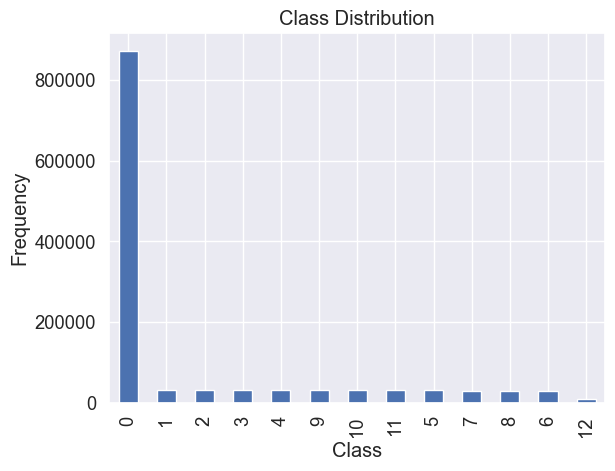

In [216]:
import matplotlib.pyplot as plt

class_distribution = fusioned_df['null_class'].value_counts()
class_distribution.plot(kind='bar') 
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

La gráfica de barras hace más claro que la clase 0 es la que más instancias tiene, siendo esto un gran imbalance de clases. 

Como la clase 0 representa los valores en donde no hay actividad, podemos procesar estos con un downsampling ya que la variación de los datos en estas instancias debería ser muy pequeña (precisamente por que la persona no se mueve) y la variación en la desviación estándar de estos valores no debería cambiar mucho incluso si reducimos la cantidad de ejmplos.

Siendo tan desproporcionado la catidad de ejmplos que hay para la clase 0, no se puede apreciar bien en la gráfica si hay otras clases desbalanceadas. Para observarlo con mayor clariad, volvemos a realizar un gráfico de barras pero ahora excluyendo la clase 0.

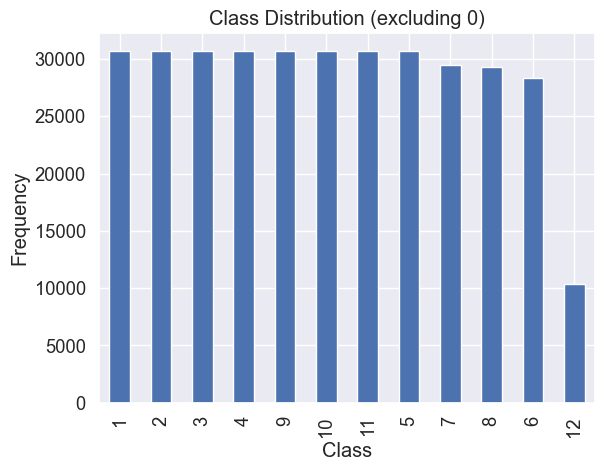

In [218]:
import matplotlib.pyplot as plt

# Filter out rows where 'null_class' is 0, then count the remaining classes
filtered_counts = fusioned_df[fusioned_df['null_class'] != 0]['null_class'].value_counts()

# Plot the resulting distribution
filtered_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution (excluding 0)')
plt.show()

Observamos que sí existe un imbalance de clase incluso dentro de las clases que sí corresponden a una actividad. Esto significa que no podemos simplemente usar métricas como accuracy para evaluar nuestros resultados (puesto que la clase 12 es la menos comun, y bastaría con clasificar normalmente las demás clases para que parezca que el modelo tiene buenos resultados sin contemplar si clasifica bien la clase 12). Por lo que será necesario utilizar métricas como Macro Average (para saber el desempeño general del modelo) y F1-score, para saber si clasifica bien cada clase. 

Asímismo, en lo que respecta al entrenamiento, tendremos que encontrar una manera de balancear esta clase minoritaria. 

## 1.7. Correlación entre atributos

Queremos encontrar sie existen valores corerlacionados, esto por dos razones:

1. **Merjoar clasificación**: Las características redundantes hacen que una misma característica tenga mayor importancia al clasificar.
2. **Menor costo computacional**: Las características requieren un gran costo computacional para procesarlas, a más tenemos mayor es el costo. Queremos reducir el costo lo máximo posible para no perder recursos procesando características innecesarias. Si están correlacionadas, significa que basta una para tener la cantidad necesaria de información.

In [220]:
import pandas as pd

df_filtered = fusioned_df.drop(columns=['mHealth_subject1'], errors='ignore')
df_numeric = df_filtered.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr(method='pearson')
corr_matrix

x_acc_chest  y_acc_chest  z_acc_chest   ecg1   ecg2  \
x_acc_chest               1.000        0.075        0.178  0.024 -0.003   
y_acc_chest               0.075        1.000       -0.347  0.027  0.007   
z_acc_chest               0.178       -0.347        1.000 -0.010 -0.010   
ecg1                      0.024        0.027       -0.010  1.000  0.597   
ecg2                     -0.003        0.007       -0.010  0.597  1.000   
x_acc_lef_ank             0.050       -0.028        0.090  0.004 -0.002   
y_acc_lef_ank             0.306       -0.092        0.230  0.003 -0.005   
z_acc_lef_ank             0.102       -0.100        0.235  0.000  0.000   
x_gyro_lef_ank            0.043       -0.038        0.048 -0.002  0.013   
y_gyro_lef_ank            0.248       -0.120        0.250  0.010  0.006   
z_gyro_lef_ank            0.050       -0.174        0.230 -0.015 -0.012   
x_mgnt_lef_ank            0.092       -0.036        0.107  0.012  0.013   
y_mgnt_lef_ank            0.011       -0.029        0.023 -0.003  0.002   
z_mgnt_lef_ank           -0.032        0.035       -0.040  0.008  0.000   
x_acc_rgt_low_arm         0.266        0.060       -0.071 -0.006 -0.011   
y_acc_rgt_low_arm         0.193       -0.045        0.309 -0.016 -0.029   
z_acc_rgt_low_arm         0.007       -0.027        0.004  0.013  0.022   
x_gyro_rgt_low_arm        0.065        0.040       -0.063  0.013  0.022   
y_gyro_rgt_low_arm        0.130       -0.149        0.334 -0.025 -0.033   
z_gyro_rgt_low_arm        0.073       -0.011        0.003 -0.002 -0.003   
x_mgnt_rgt_low_arm        0.010       -0.044       -0.006  0.010  0.010   
y_mgnt_rgt_low_arm        0.012       -0.059       -0.016 -0.019 -0.006   
z_mgnt_rgt_low_arm        0.003        0.123        0.029  0.021  0.003   
null_class                0.127        0.094       -0.131  0.002 -0.008   

                    x_acc_lef_ank  y_acc_lef_ank  z_acc_lef_ank  \
x_acc_chest                 0.050          0.306          0.102   
y_acc_chest                -0.028         -0.092         -0.100   
z_acc_chest                 0.090          0.230          0.235   
ecg1                        0.004          0.003          0.000   
ecg2                       -0.002         -0.005          0.000   
x_acc_lef_ank               1.000          0.018         -0.071   
y_acc_lef_ank               0.018          1.000          0.078   
z_acc_lef_ank              -0.071          0.078          1.000   
x_gyro_lef_ank              0.062          0.049          0.029   
y_gyro_lef_ank              0.087          0.350          0.165   
z_gyro_lef_ank             -0.034          0.058          0.126   
x_mgnt_lef_ank             -0.031          0.067         -0.207   
y_mgnt_lef_ank             -0.223          0.033         -0.071   
z_mgnt_lef_ank              0.042         -0.027          0.120   
x_acc_rgt_low_arm          -0.051          0.067         -0.125   
y_acc_rgt_low_arm           0.060          0.106          0.193   
z_acc_rgt_low_arm          -0.004          0.092          0.087   
x_gyro_rgt_low_arm         -0.026          0.050          0.042   
y_gyro_rgt_low_arm          0.064          0.152          0.077   
z_gyro_rgt_low_arm          0.016          0.105         -0.005   
x_mgnt_rgt_low_arm         -0.010         -0.049          0.029   
y_mgnt_rgt_low_arm          0.001         -0.061          0.014   
z_mgnt_rgt_low_arm          0.005          0.005          0.018   
null_class                  0.053          0.000         -0.088   

                    x_gyro_lef_ank  y_gyro_lef_ank  ...  x_acc_rgt_low_arm  \
x_acc_chest                  0.043           0.248  ...              0.266   
y_acc_chest                 -0.038          -0.120  ...              0.060   
z_acc_chest                  0.048           0.250  ...             -0.071   
ecg1                        -0.002           0.010  ...             -0.006   
ecg2                         0.013           0.006  ...             -0.011   


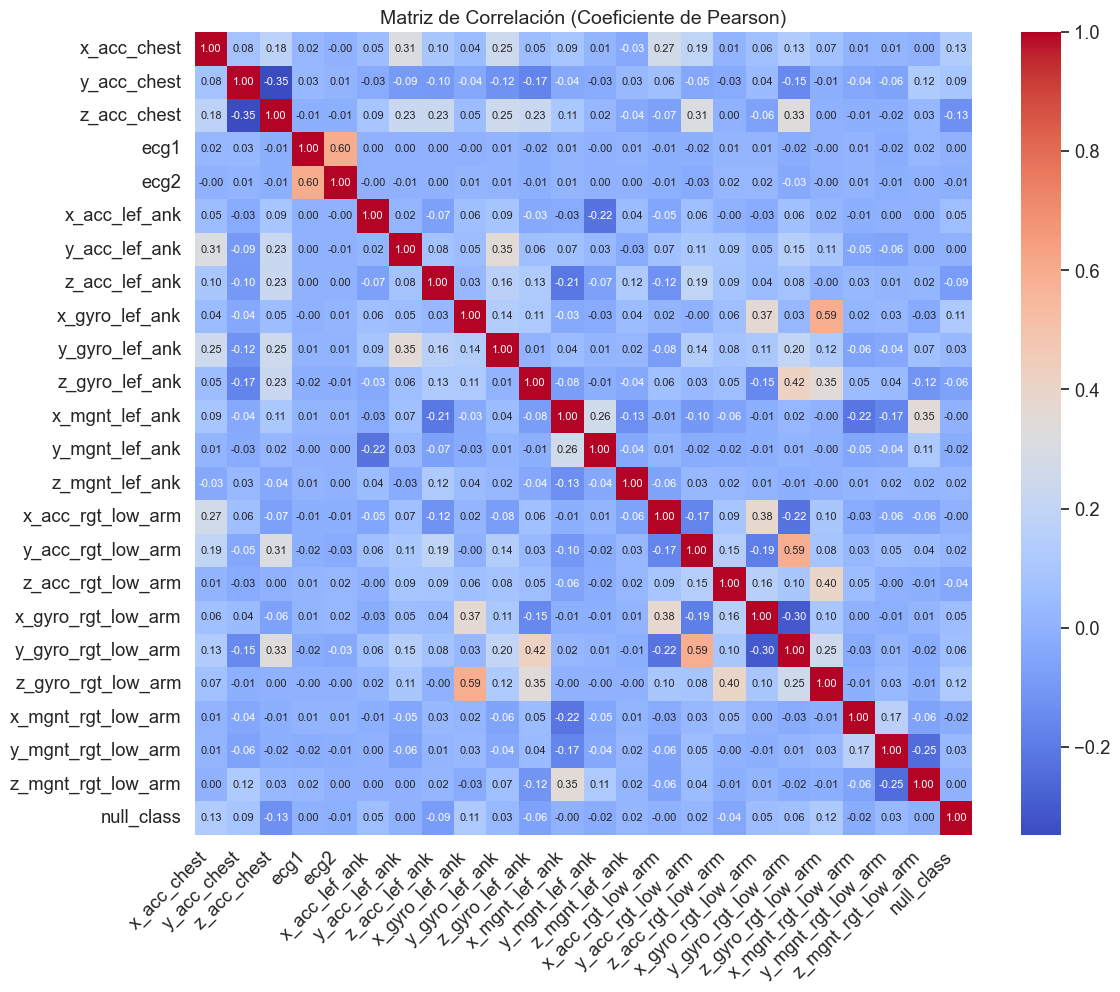

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  
sns.heatmap(
    corr_matrix, 
    annot=True,       # Muestra valores numéricos
    fmt=".2f",        # Formato con 2 decimales
    cmap="coolwarm", 
    annot_kws={"size": 8}  # Tamaño de fuente de los valores
)

# Rotar las etiquetas del eje X para que no se encimen
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Ajusta automáticamente los márgenes
plt.tight_layout()

plt.title('Matriz de Correlación (Coeficiente de Pearson)', fontsize=14)
plt.show()


En el gráfico podemos observar que existen pocos valores que vayan más allá de 0.5, esto sugiere que los atributos no están fuertemente correlacionados. 

En concreto. Las correlaciones más altas (mayores a 0.5) se encuentarn en:

- ecg2 y ecg1
- z_gyro_rgt_low_arm y x_gyro_left_ank
- y_gyro_rgt_low_arm y y_acc_rgt_low_arm

Esto sugiere que podríamos eliminar alguna de estas características para reducir las correlaciones.

## 1.8. Histograma de atributos

<Figure size 2000x4000 with 0 Axes>

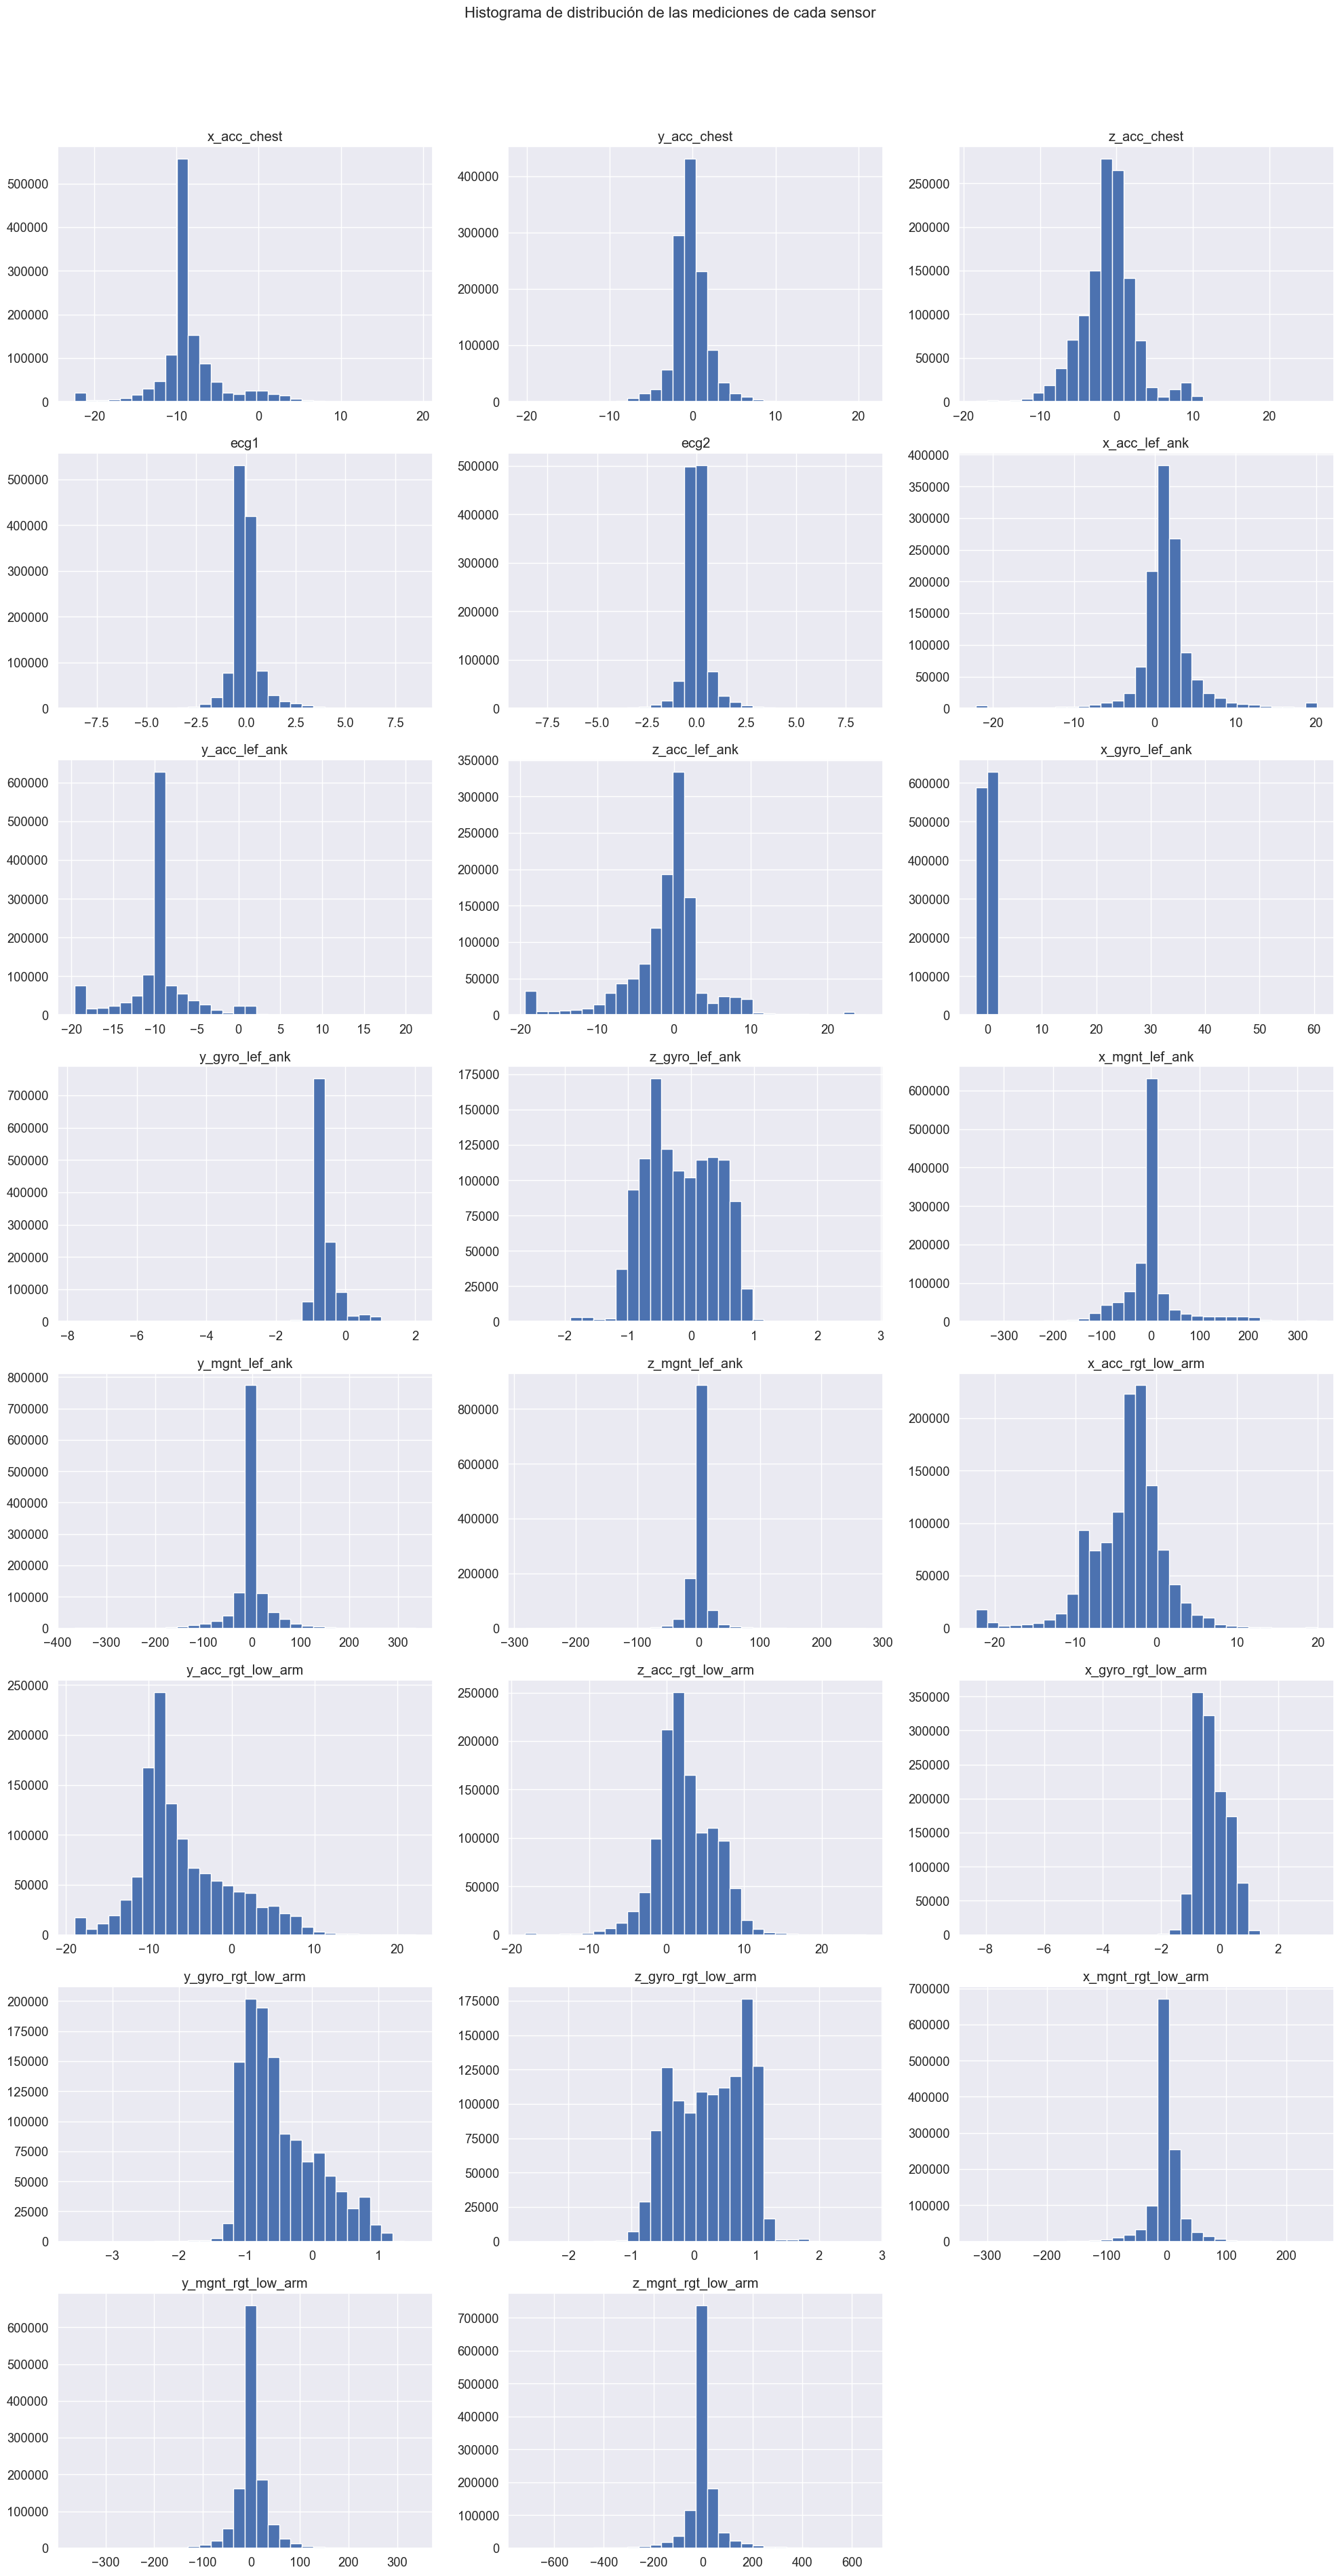

In [226]:
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionamos solo las columnas numéricas y excluimos 'null_class'
df_numeric = fusioned_df.select_dtypes(include=['number']).drop(columns=['null_class'], errors='ignore')

# Calculamos cuántos atributos numéricos hay
num_attributes = df_numeric.shape[1]

# Máximo 3 columnas por fila
cols = 3
rows = math.ceil(num_attributes / cols)

# Aumentamos el tamaño total de la figura
plt.figure(figsize=(20, 5 * rows))

# Generar histogramas con layout y bins configurados
df_numeric.hist(
    bins=30,
    layout=(rows, cols),
    figsize=(20, 5 * rows)
)

plt.suptitle("Histograma de distribución de las mediciones de cada sensor", fontsize=16)

# Ajustar espaciado para que el título no se sobreponga
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Vemos que hay varios cuyas distribuciones no se asemejan a la normal, esto indica que podríamos necesitar aplicar estandarización (o era normalización? cuál era?)

Podemos confirmar cuáles son las que no se distribuyen como la normal utilizando la prueba Shapiro-wilk, cuya hipótesis nula es que se distribuye como normal, mientras que la alternativa es que se distribuye diferente a la normal. En esta pruba buscmaos un p-valor superior a 0.05 ya que nos indica que no hay suficiente evidencia para aformar que no es normal. 

## 1.9. Gráfica de densidad para los atributos

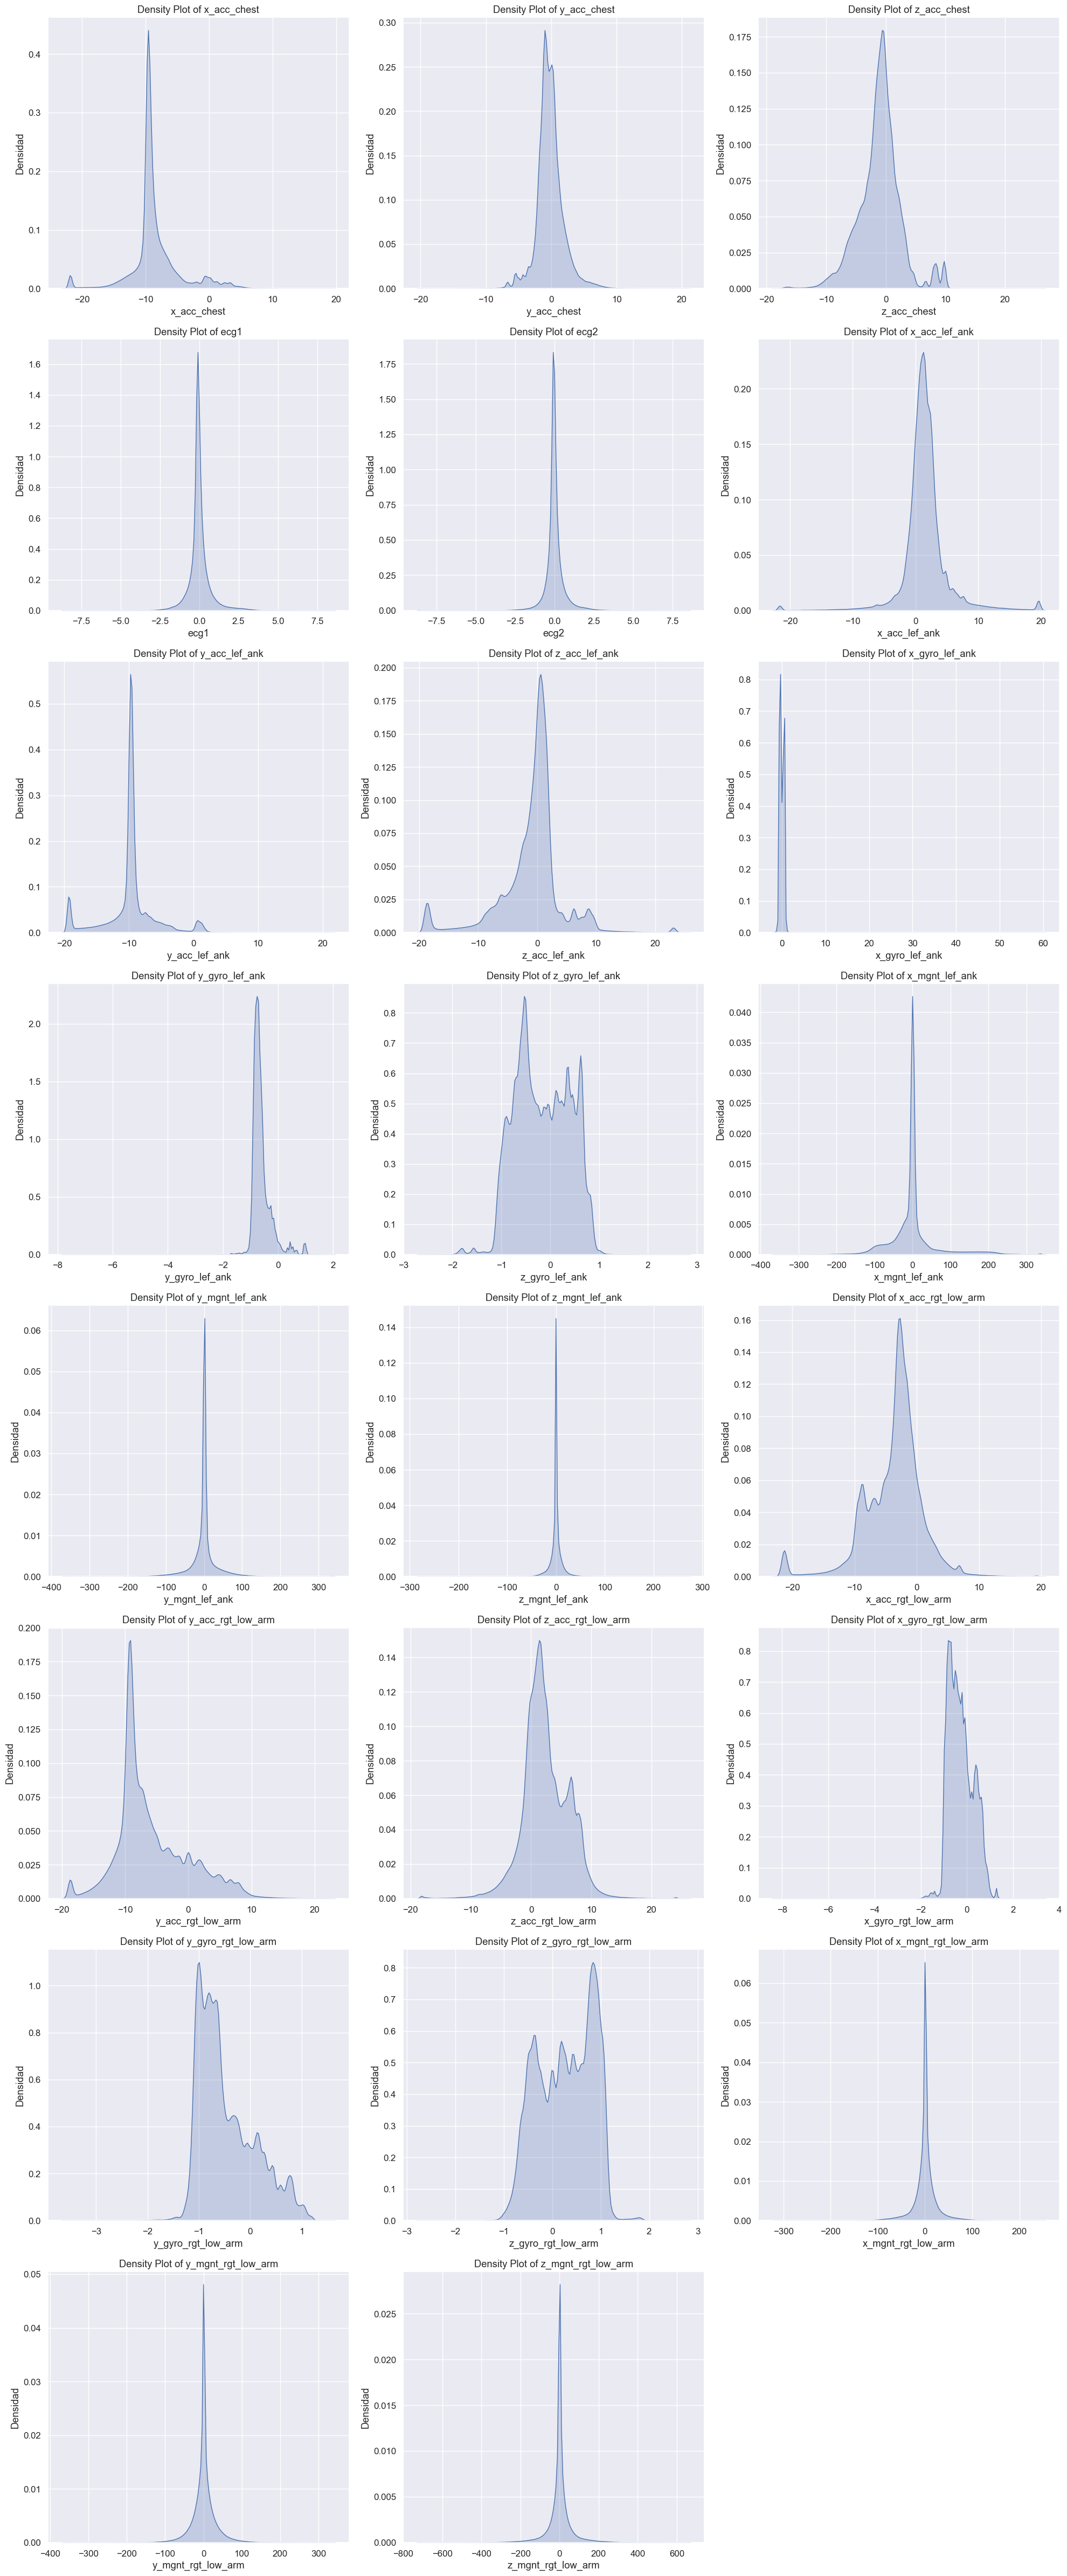

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Supongamos que fusioned_df es tu DataFrame
# Seleccionamos solo las columnas numéricas y, si es necesario, excluimos 'null_class'
df_numeric = fusioned_df.select_dtypes(include=['number']).drop(columns=['null_class'], errors='ignore')

# Obtenemos la lista de columnas numéricas
numeric_cols = df_numeric.columns

# Configuramos el layout: máximo 3 columnas por fila
cols = 3
rows = math.ceil(len(numeric_cols) / cols)

# Creamos una figura grande
plt.figure(figsize=(20, 6 * rows))

# Iteramos por cada columna numérica y generamos su gráfica de densidad
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.kdeplot(data=df_numeric, x=col, fill=True)
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.title(f"Density Plot of {col}")

plt.tight_layout()
plt.show()


## 1.10. Gráfica de caja y bigotes para la distribución de los atributos. 

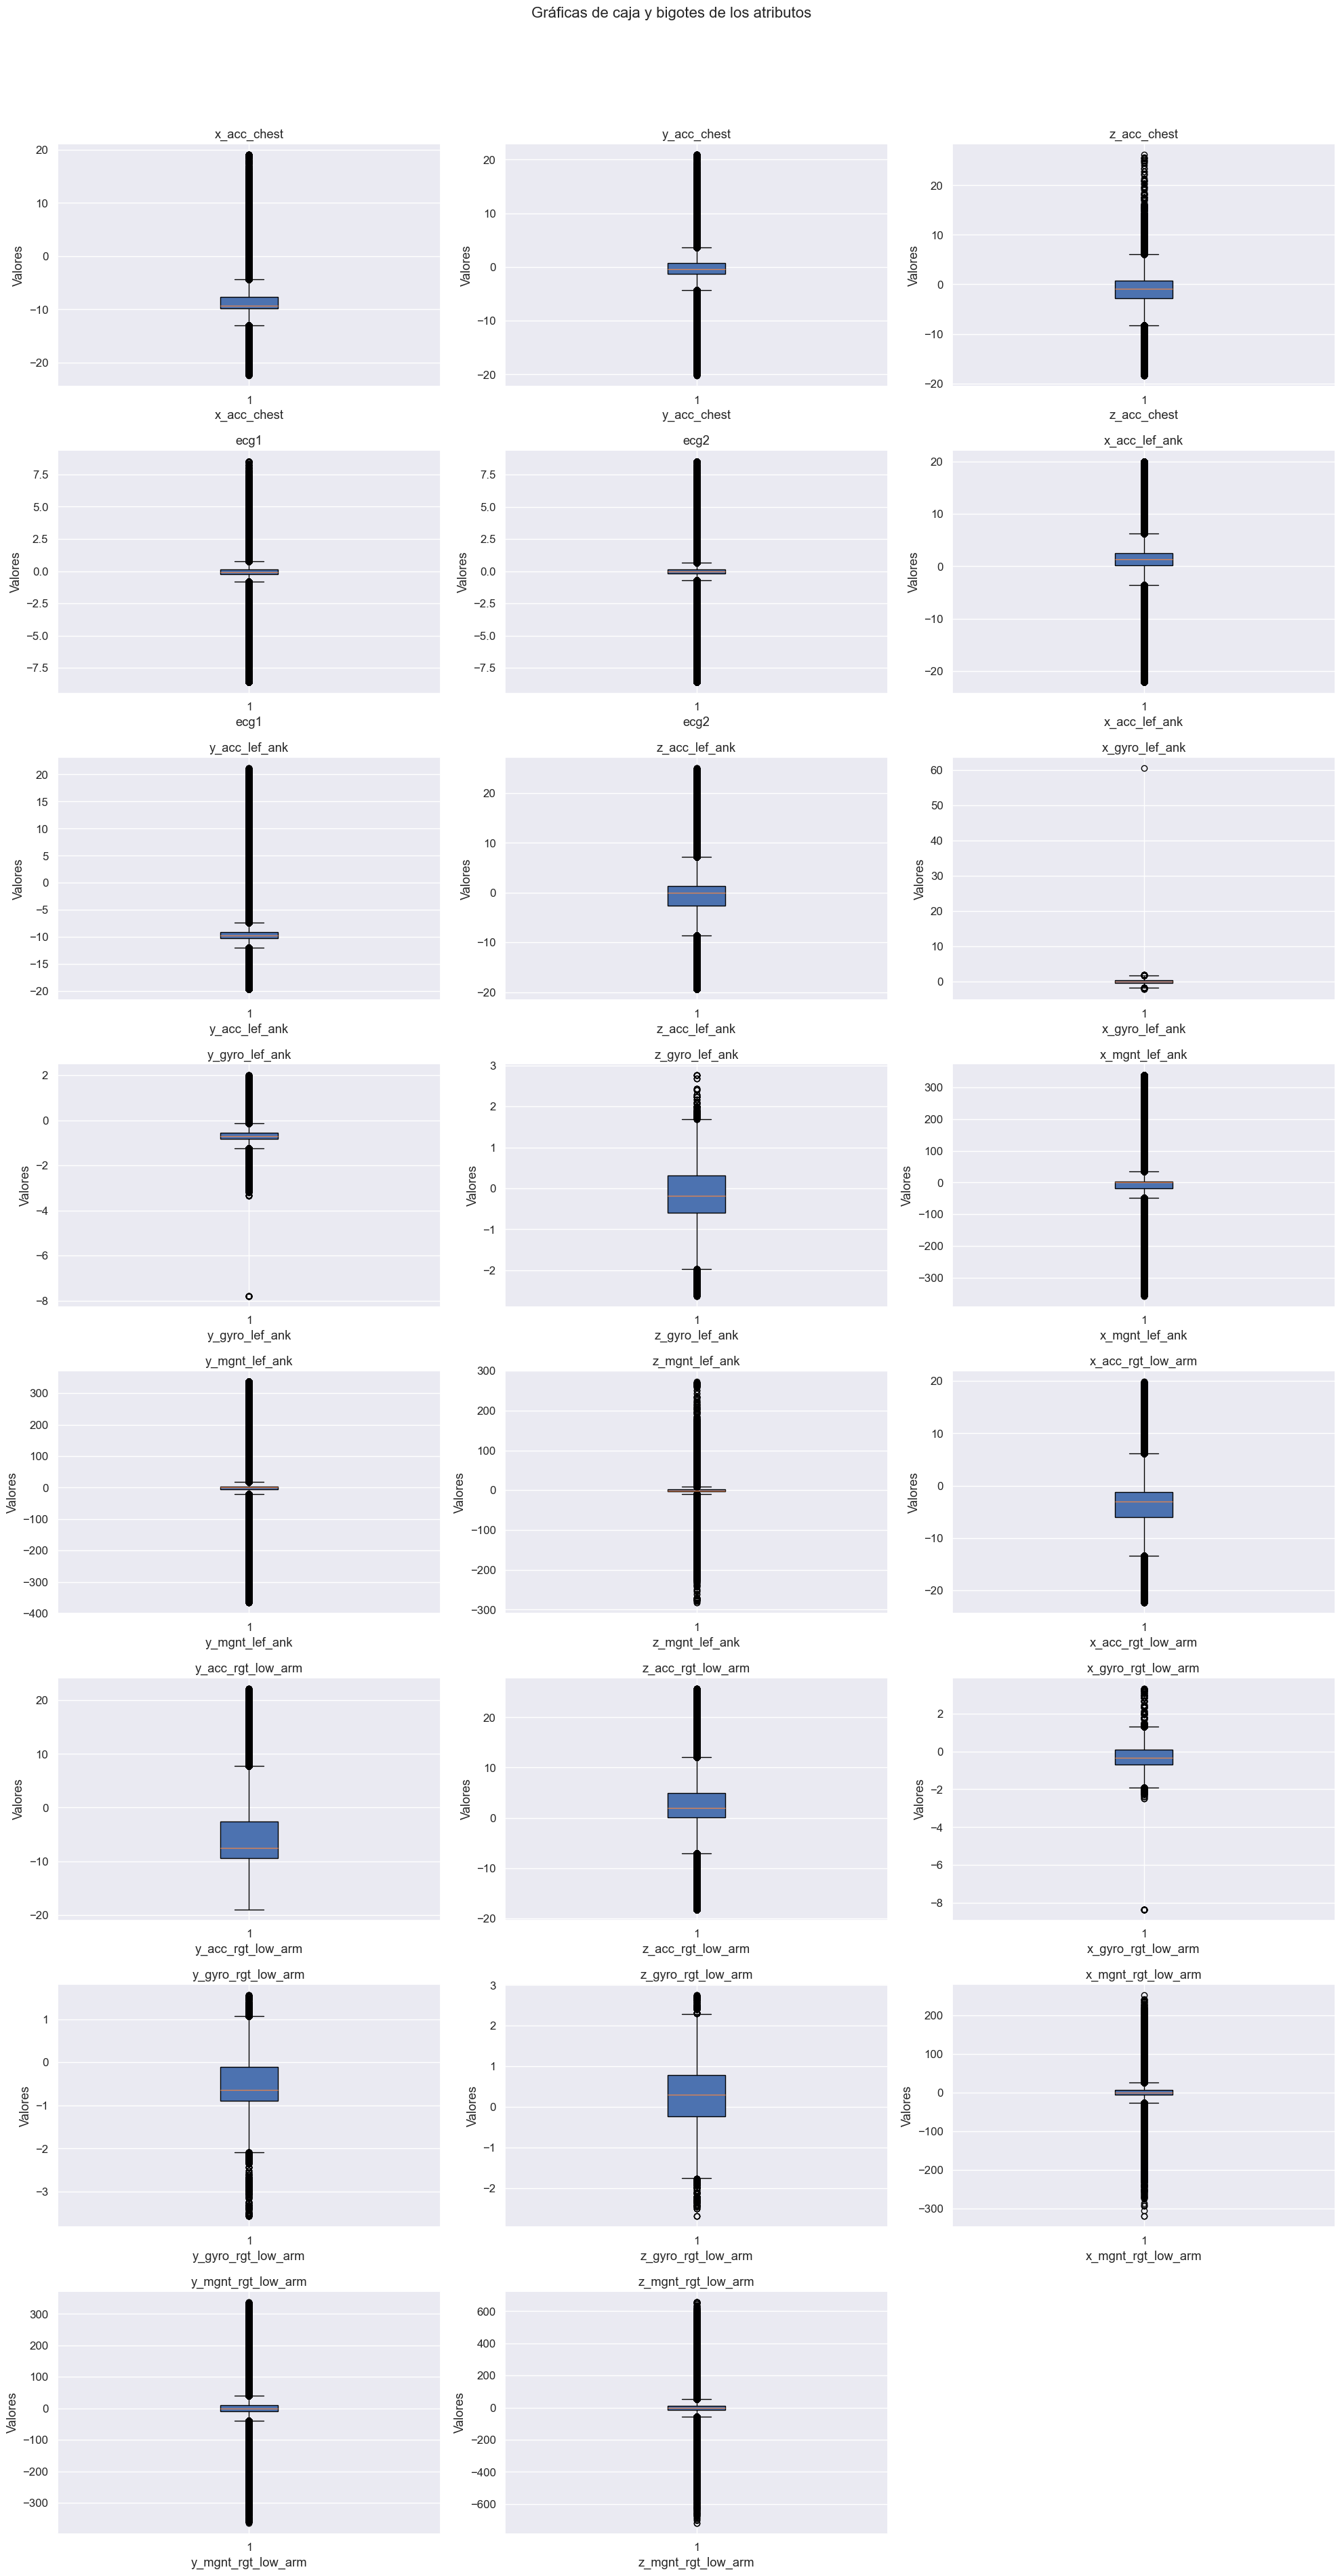

In [256]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Supongamos que fusioned_df es tu DataFrame
# Seleccionamos solo las columnas numéricas y eliminamos 'null_class' si existe
df_numeric = fusioned_df.select_dtypes(include=['number']).drop(columns=['null_class'], errors='ignore')

# Número de atributos numéricos
num_attributes = df_numeric.shape[1]

# Configuramos el layout: máximo 3 columnas por fila
cols = 3
rows = math.ceil(num_attributes / cols)

# Creamos la figura con tamaño grande
plt.figure(figsize=(20, 5 * rows))

# Iteramos sobre cada columna para generar su box plot
for i, col in enumerate(df_numeric.columns):
    ax = plt.subplot(rows, cols, i + 1)
    # Dibujamos la caja y bigotes; usamos dropna() para evitar valores nulos
    ax.boxplot(df_numeric[col].dropna(), vert=True, patch_artist=True)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Valores")

plt.suptitle("Gráficas de caja y bigotes de los atributos", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## 1.11. Matriz de correlación

CUÁL ES LA DIFERENCIA CON EL 7?????????????

## 1.12. Matriz de dispersión de los atributos

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponemos que fusioned_df es tu DataFrame.
# Seleccionamos solo las columnas numéricas y, si existe, descartamos 'null_class'
df_numeric = fusioned_df.select_dtypes(include=['number']).drop(columns=['null_class'], errors='ignore')

# Lista de nombres de columnas numéricas
cols = list(df_numeric.columns)
n = len(cols)

# Creamos una figura con una grilla de n x n subplots
fig, axes = plt.subplots(n, n, figsize=(4 * n, 4 * n))

for i in range(n):
    for j in range(n):
        ax = axes[i, j]
        if i == j:
            # Diagonal: se muestra un histograma del mismo atributo
            df_numeric[cols[i]].plot(kind='hist', bins=30, ax=ax, color='skyblue', edgecolor='black')
            ax.set_title(cols[i], fontsize=10)
        else:
            # Fuera de la diagonal: gráfica de dispersión usando .plot() con markers y sin línea
            ax.plot(df_numeric[cols[j]], df_numeric[cols[i]], linestyle='', marker='o', markersize=2, color='darkblue')
        
        # Para mejorar la legibilidad, removemos etiquetas en ejes internos
        if i < n - 1:
            ax.set_xticklabels([])
        if j > 0:
            ax.set_yticklabels([])

plt.tight_layout()
plt.show()


## 1.13. Escalamiento, normalizacion o estándarización

# 2. Segunda base de datos. PAMAP 2

## 2.1. Cargar datos

In [228]:
src = "datasets/2_PAMAP2/PAMAP2_Dataset/Protocol/"
keys = [
    "timestamp",
    "activityID",
    "heart_rate_bpm",
    # IMU Hand (columns 4–20)
    "IMU_Hand_temperature",
    "IMU_Hand_acceleration_16g_x",
    "IMU_Hand_acceleration_16g_y",
    "IMU_Hand_acceleration_16g_z",
    "IMU_Hand_acceleration_6g_x",
    "IMU_Hand_acceleration_6g_y",
    "IMU_Hand_acceleration_6g_z",
    "IMU_Hand_gyroscope_x",
    "IMU_Hand_gyroscope_y",
    "IMU_Hand_gyroscope_z",
    "IMU_Hand_magnetometer_x",
    "IMU_Hand_magnetometer_y",
    "IMU_Hand_magnetometer_z",
    "IMU_Hand_orientation_1",
    "IMU_Hand_orientation_2",
    "IMU_Hand_orientation_3",
    "IMU_Hand_orientation_4",
    # IMU Chest (columns 21–37)
    "IMU_Chest_temperature",
    "IMU_Chest_acceleration_16g_x",
    "IMU_Chest_acceleration_16g_y",
    "IMU_Chest_acceleration_16g_z",
    "IMU_Chest_acceleration_6g_x",
    "IMU_Chest_acceleration_6g_y",
    "IMU_Chest_acceleration_6g_z",
    "IMU_Chest_gyroscope_x",
    "IMU_Chest_gyroscope_y",
    "IMU_Chest_gyroscope_z",
    "IMU_Chest_magnetometer_x",
    "IMU_Chest_magnetometer_y",
    "IMU_Chest_magnetometer_z",
    "IMU_Chest_orientation_1",
    "IMU_Chest_orientation_2",
    "IMU_Chest_orientation_3",
    "IMU_Chest_orientation_4",
    # IMU Ankle (columns 38–54)
    "IMU_Ankle_temperature",
    "IMU_Ankle_acceleration_16g_x",
    "IMU_Ankle_acceleration_16g_y",
    "IMU_Ankle_acceleration_16g_z",
    "IMU_Ankle_acceleration_6g_x",
    "IMU_Ankle_acceleration_6g_y",
    "IMU_Ankle_acceleration_6g_z",
    "IMU_Ankle_gyroscope_x",
    "IMU_Ankle_gyroscope_y",
    "IMU_Ankle_gyroscope_z",
    "IMU_Ankle_magnetometer_x",
    "IMU_Ankle_magnetometer_y",
    "IMU_Ankle_magnetometer_z",
    "IMU_Ankle_orientation_1",
    "IMU_Ankle_orientation_2",
    "IMU_Ankle_orientation_3",
    "IMU_Ankle_orientation_4"
]

file_extension = '.dat'
delimiter = r'\s+'
data_loader_pamap = DataLoader(src, keys, file_extension, delimiter)
pamap_data = data_loader_pamap.load_data()

pamap_data.shape

(2872533, 55)

## 2.2. Dimensiones y Primeras 5 filas

In [230]:
pamap_data.shape

(2872533, 55)

## 2.3. Identifica y elimina los datos ausentes

In [232]:
pamap_data.isnull().sum()

timestamp                             0
activityID                            0
heart_rate_bpm                  2610265
IMU_Hand_temperature              13141
IMU_Hand_acceleration_16g_x       13141
IMU_Hand_acceleration_16g_y       13141
IMU_Hand_acceleration_16g_z       13141
IMU_Hand_acceleration_6g_x        13141
IMU_Hand_acceleration_6g_y        13141
IMU_Hand_acceleration_6g_z        13141
IMU_Hand_gyroscope_x              13141
IMU_Hand_gyroscope_y              13141
IMU_Hand_gyroscope_z              13141
IMU_Hand_magnetometer_x           13141
IMU_Hand_magnetometer_y           13141
IMU_Hand_magnetometer_z           13141
IMU_Hand_orientation_1            13141
IMU_Hand_orientation_2            13141
IMU_Hand_orientation_3            13141
IMU_Hand_orientation_4            13141
IMU_Chest_temperature              3563
IMU_Chest_acceleration_16g_x       3563
IMU_Chest_acceleration_16g_y       3563
IMU_Chest_acceleration_16g_z       3563
IMU_Chest_acceleration_6g_x        3563


Aquí sí hay datos faltantes. HAY QUE ENCONTRAR LA MEJOR FORMA DE ARREGARLO. EN CUALQUIER CASO, ANTES DE MOVERLE, HAY QUE DIVIDIR EN TRAIN/TEST. Como son pocas muestras, hay que elegir el split que con la menor cantidad de muestras tenga la mayor variación para el de prueba, el resto debe ir a entrenamiento.

## 2.4. Tipos de datos de cada atributo

In [234]:
pamap_data.dtypes

timestamp                       float64
activityID                        int64
heart_rate_bpm                  float64
IMU_Hand_temperature            float64
IMU_Hand_acceleration_16g_x     float64
IMU_Hand_acceleration_16g_y     float64
IMU_Hand_acceleration_16g_z     float64
IMU_Hand_acceleration_6g_x      float64
IMU_Hand_acceleration_6g_y      float64
IMU_Hand_acceleration_6g_z      float64
IMU_Hand_gyroscope_x            float64
IMU_Hand_gyroscope_y            float64
IMU_Hand_gyroscope_z            float64
IMU_Hand_magnetometer_x         float64
IMU_Hand_magnetometer_y         float64
IMU_Hand_magnetometer_z         float64
IMU_Hand_orientation_1          float64
IMU_Hand_orientation_2          float64
IMU_Hand_orientation_3          float64
IMU_Hand_orientation_4          float64
IMU_Chest_temperature           float64
IMU_Chest_acceleration_16g_x    float64
IMU_Chest_acceleration_16g_y    float64
IMU_Chest_acceleration_16g_z    float64
IMU_Chest_acceleration_6g_x     float64


## 2.5. Resumen estadístico

In [236]:
pamap_data.describe()

timestamp  activityID  heart_rate_bpm  IMU_Hand_temperature  \
count 2872533.000 2872533.000      262268.000           2859392.000   
mean     1834.354       5.466         109.873                32.653   
std      1105.689       6.331          25.870                 1.844   
min         5.640       0.000          57.000                24.750   
25%       893.160       0.000          90.000                31.438   
50%      1790.830       3.000         108.000                33.125   
75%      2710.570       7.000         125.000                34.000   
max      4475.630      24.000         202.000                35.500   

       IMU_Hand_acceleration_16g_x  IMU_Hand_acceleration_16g_y  \
count                  2859392.000                  2859392.000   
mean                        -4.961                        3.588   
std                          5.985                        6.278   
min                       -145.367                     -104.301   
25%                         -9.028                        1.290   
50%                         -5.788                        3.571   
75%                         -0.783                        6.603   
max                         62.860                      155.699   

       IMU_Hand_acceleration_16g_z  IMU_Hand_acceleration_6g_x  \
count                  2859392.000                 2859392.000   
mean                         3.168                      -4.889   
std                          3.844                       5.993   
min                       -101.452                     -61.489   
25%                          0.969                      -8.933   
50%                          2.958                      -5.738   
75%                          6.003                      -0.725   
max                        157.760                      52.821   

       IMU_Hand_acceleration_6g_y  IMU_Hand_acceleration_6g_z  ...  \
count                 2859392.000                 2859392.000  ...   
mean                        3.584                       3.349  ...   
std                         6.056                       3.841  ...   
min                       -61.868                     -61.935  ...   
25%                         1.285                       1.164  ...   
50%                         3.613                       3.133  ...   
75%                         6.602                       6.258  ...   
max                        62.260                      61.945  ...   

       IMU_Ankle_gyroscope_x  IMU_Ankle_gyroscope_y  IMU_Ankle_gyroscope_z  \
count            2860784.000            2860784.000            2860784.000   
mean                   0.009                 -0.035                  0.008   
std                    1.074                  0.597                  1.843   
min                  -23.995                -18.127                -14.020   
25%                   -0.153                 -0.083                 -0.308   
50%                    0.004                 -0.004                 -0.002   
75%                    0.095                  0.083                  0.063   
max                   17.420                 13.588                 16.529   

       IMU_Ankle_magnetometer_x  IMU_Ankle_magnetometer_y  \
count               2860784.000               2860784.000   
mean                    -32.721                     1.593   
std                      18.879                    21.612   
min                    -172.865                  -137.908   
25%                     -42.895                   -11.485   
50%                     -33.900                     1.363   
75%                     -19.059                    17.331   
max                      97.525                   123.306   

       IMU_Ankle_magnetometer_z  IMU_Ankle_orientation_1  \
count               2860784.000              2860784.000   
mean                     16.890                    0.399   
std                      20.309                    0.303   
min                    -109.289              

## 2.6. Distribución de clases

In [238]:
class_distribution_pamap = pamap_data['activityID'].value_counts()
class_distribution_pamap

activityID
0     929661
4     238761
17    238690
1     192523
3     189931
7     188107
2     185188
16    175353
6     164600
12    117216
13    104944
5      98199
24     49360
Name: count, dtype: int64

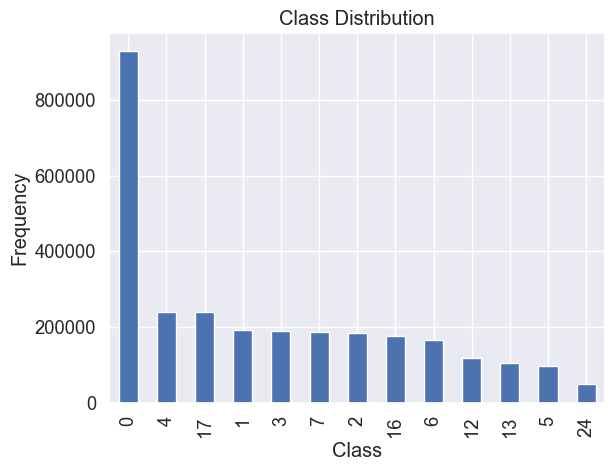

In [240]:
import matplotlib.pyplot as plt

class_distribution_pamap = pamap_data['activityID'].value_counts()
class_distribution_pamap.plot(kind='bar') 
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

Al igual que el anterior, hay imbalance de clases siendo la clase mayor la "0", que corresponde a "otros"

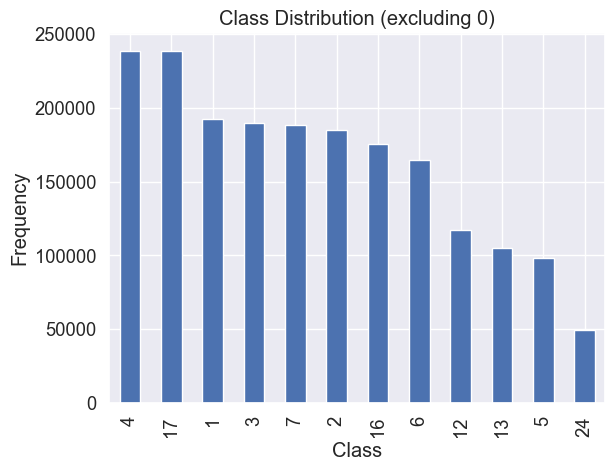

In [242]:
import matplotlib.pyplot as plt

# Filter out rows where 'activityID' is 0, then count the remaining classes
pamap_filtered_counts = pamap_data[pamap_data['activityID'] != 0]['activityID'].value_counts()

# Plot the resulting distribution
pamap_filtered_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution (excluding 0)')
plt.show()

Notamos un imbalance de clases en donde la clase menor es la clase 24. Tiene casi 4 veces menos que la clase 4. Por esto tenemos que usar métricas como Macro Average para ver la clasificación general y F1-score para la clasificación por nivel.

## 2.7. Correlación entre atributos

In [244]:
import pandas as pd

pamap_filtered = pamap_data.drop(columns=['activityID'], errors='ignore')
pamap_nmeric = pamap_filtered.select_dtypes(include=['number'])

pamap_corr_matrix = pamap_nmeric.corr(method='pearson')
pamap_corr_matrix

timestamp  heart_rate_bpm  IMU_Hand_temperature  \
timestamp                         1.000           0.732                -0.506   
heart_rate_bpm                    0.732           1.000                -0.377   
IMU_Hand_temperature             -0.506          -0.377                 1.000   
IMU_Hand_acceleration_16g_x      -0.171          -0.195                 0.009   
IMU_Hand_acceleration_16g_y       0.008           0.028                -0.049   
IMU_Hand_acceleration_16g_z      -0.172          -0.213                 0.071   
IMU_Hand_acceleration_6g_x       -0.180          -0.203                 0.023   
IMU_Hand_acceleration_6g_y        0.005           0.025                -0.045   
IMU_Hand_acceleration_6g_z       -0.182          -0.220                 0.088   
IMU_Hand_gyroscope_x              0.007           0.008                -0.018   
IMU_Hand_gyroscope_y              0.036           0.050                -0.016   
IMU_Hand_gyroscope_z              0.002          -0.002                -0.000   
IMU_Hand_magnetometer_x           0.208           0.201                -0.061   
IMU_Hand_magnetometer_y          -0.042          -0.086                -0.018   
IMU_Hand_magnetometer_z           0.064           0.078                -0.023   
IMU_Hand_orientation_1            0.013           0.081                -0.079   
IMU_Hand_orientation_2           -0.037          -0.001                 0.031   
IMU_Hand_orientation_3           -0.090          -0.076                -0.032   
IMU_Hand_orientation_4            0.018           0.014                -0.056   
IMU_Chest_temperature            -0.154          -0.169                 0.783   
IMU_Chest_acceleration_16g_x     -0.033          -0.016                 0.031   
IMU_Chest_acceleration_16g_y      0.128           0.144                 0.029   
IMU_Chest_acceleration_16g_z     -0.396          -0.335                 0.081   
IMU_Chest_acceleration_6g_x      -0.033          -0.018                 0.046   
IMU_Chest_acceleration_6g_y       0.129           0.145                 0.027   
IMU_Chest_acceleration_6g_z      -0.398          -0.338                 0.092   
IMU_Chest_gyroscope_x             0.003           0.007                -0.001   
IMU_Chest_gyroscope_y             0.020           0.015                -0.008   
IMU_Chest_gyroscope_z            -0.011          -0.016                 0.003   
IMU_Chest_magnetometer_x         -0.117          -0.111                -0.047   
IMU_Chest_magnetometer_y         -0.294          -0.355                -0.000   
IMU_Chest_magnetometer_z          0.420           0.352                -0.170   
IMU_Chest_orientation_1          -0.168          -0.011                -0.019   
IMU_Chest_orientation_2          -0.184          -0.033                 0.067   
IMU_Chest_orientation_3          -0.181          -0.184                 0.160   
IMU_Chest_orientation_4          -0.192          -0.188                 0.131   
IMU_Ankle_temperature            -0.168          -0.085                 0.530   
IMU_Ankle_acceleration_16g_x      0.245           0.226                -0.040   
IMU_Ankle_acceleration_16g_y      0.145           0.157                -0.036   
IMU_Ankle_acceleration_16g_z      0.037           0.007                -0.069   
IMU_Ankle_acceleration_6g_x       0.256           0.239                -0.038   
IMU_Ankle_acceleration_6g_y       0.157           0.171                -0.040   
IMU_Ankle_acceleration_6g_z       0.038           0.004                -0.071   
IMU_Ankle_gyroscope_x             0.004           0.004                 0.001   
IMU_Ankle_gyroscope_y            -0.030          -0.016                 0.018   
IMU_Ankle_gyroscope_z            -0.000           0.005                 0.002   
IMU_Ankle_magnetometer_x         -0.227          -0.265                 0.084   
IMU_Ankle_magnetometer_y         -0.140          -0.169                 0.098   
IMU_Ankle_magnetometer_z         -0.071          -0.070      

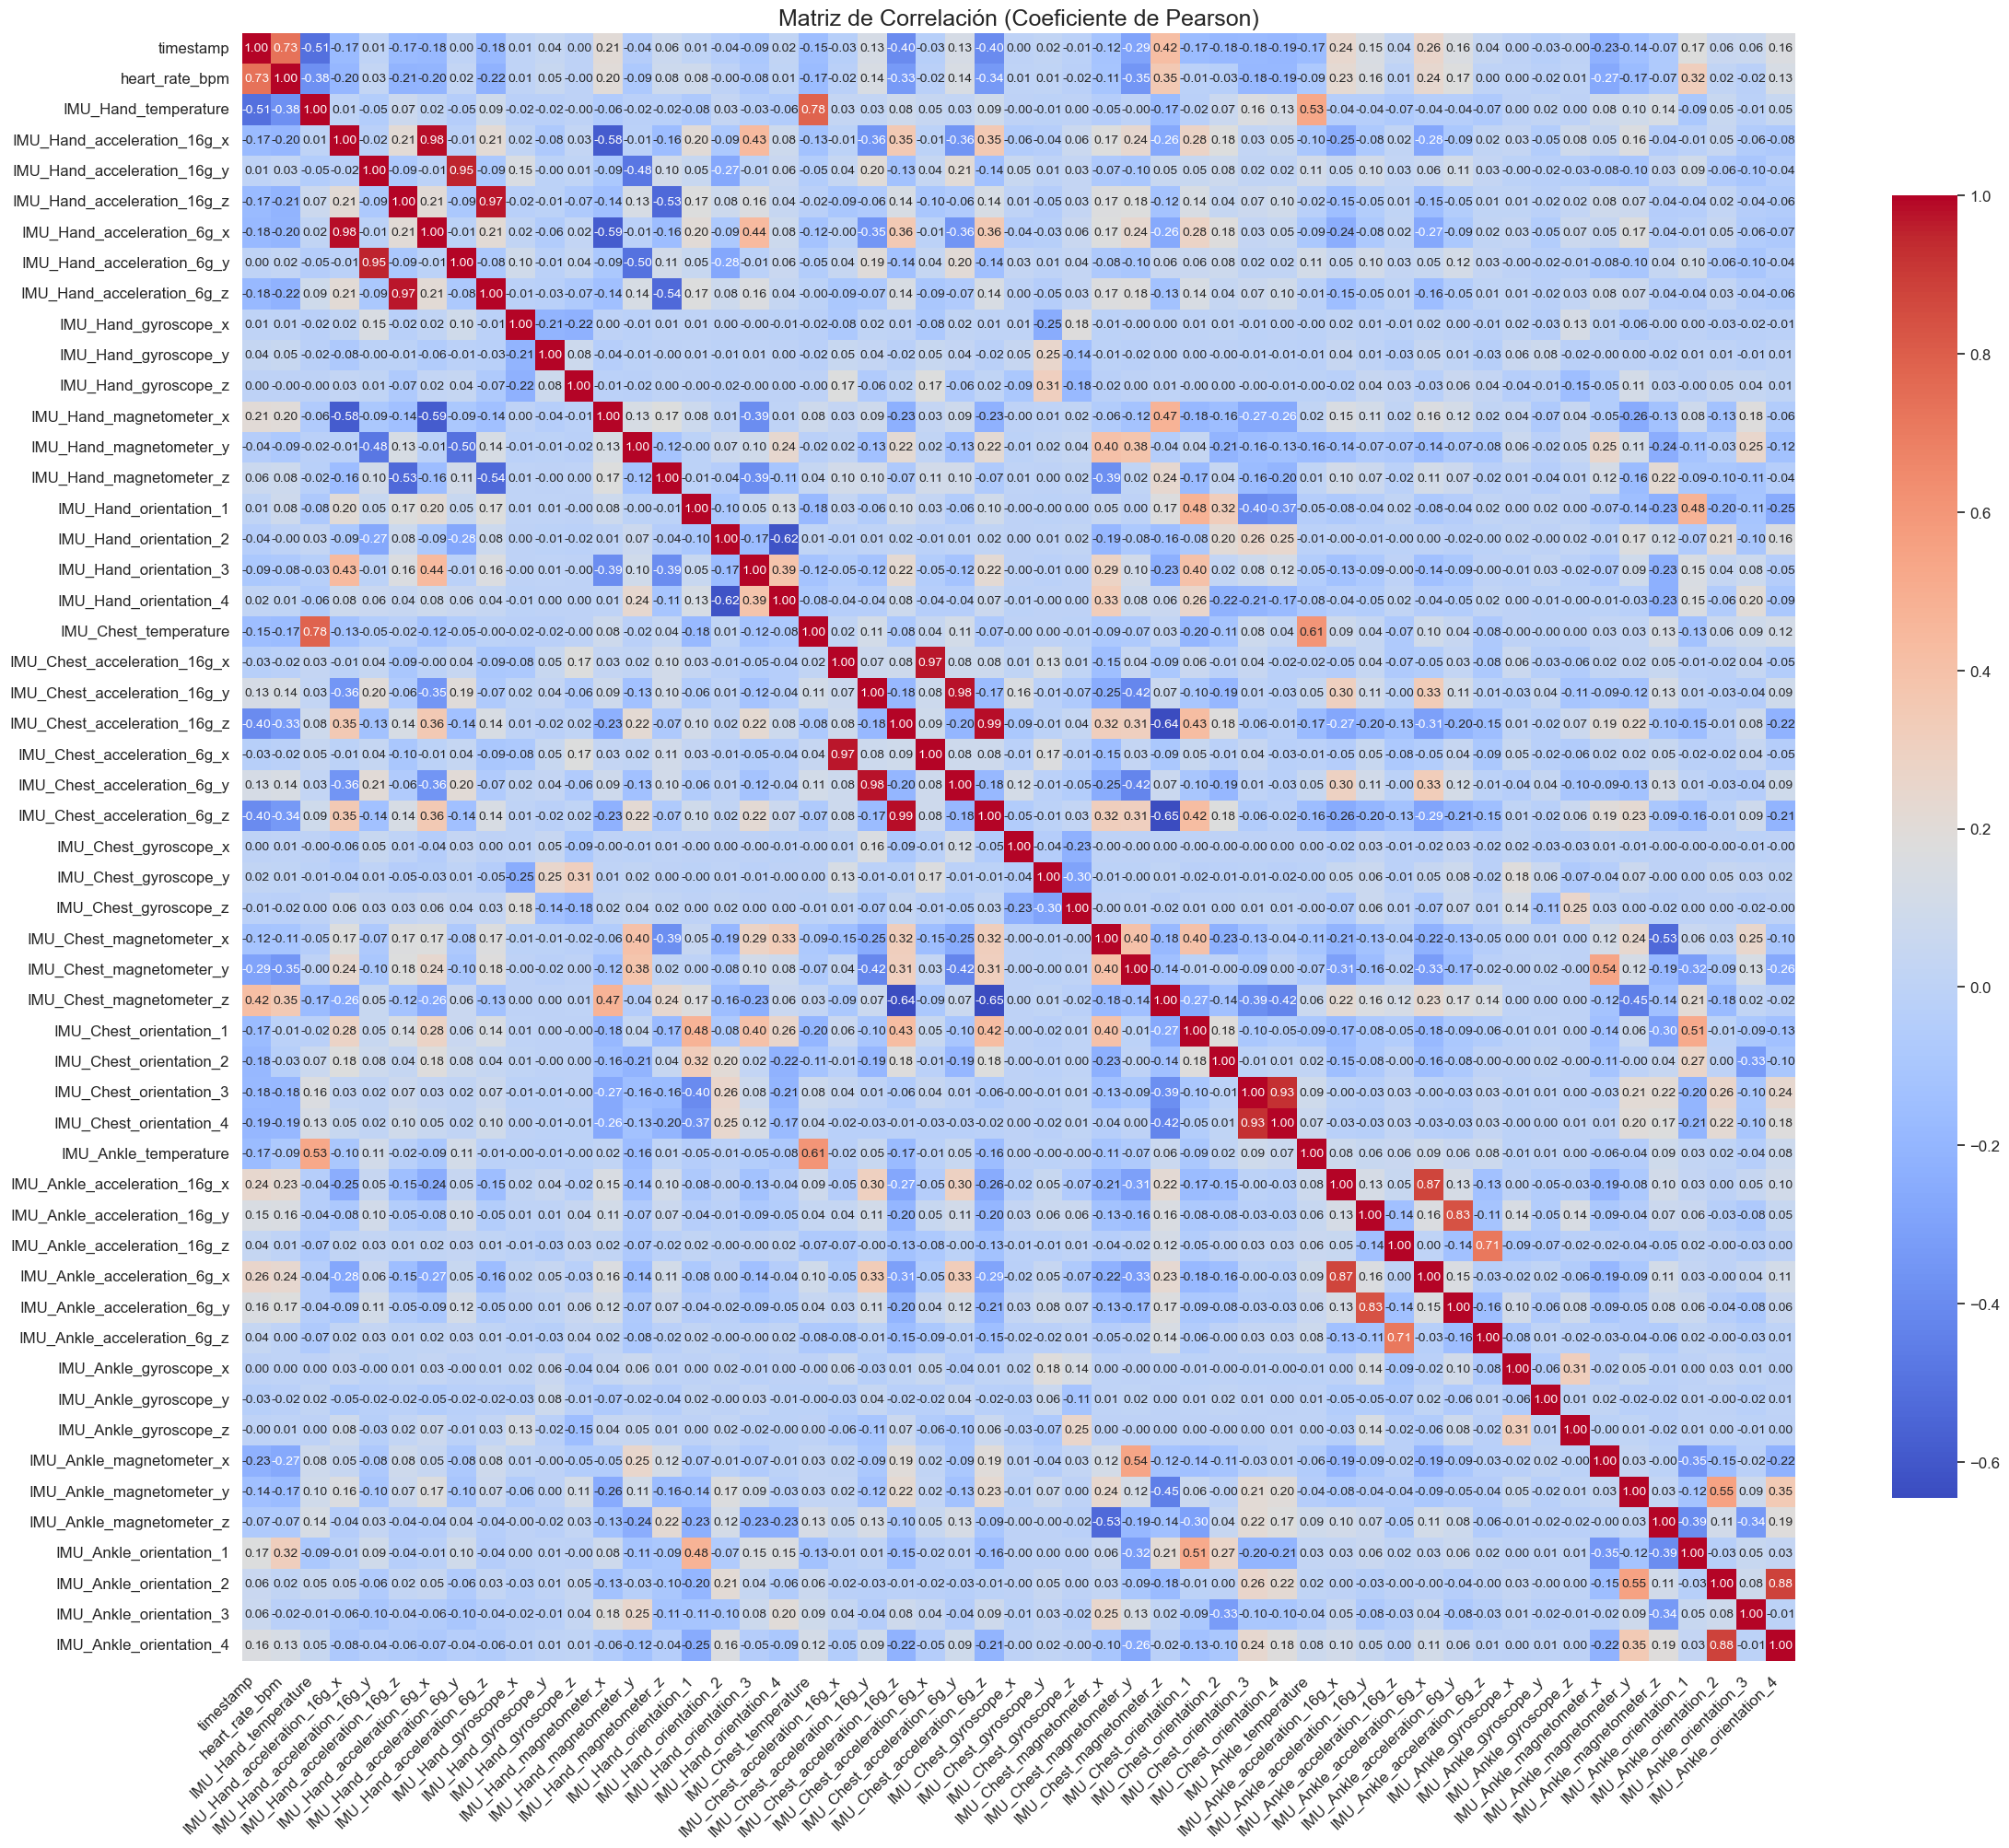

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.1)

plt.figure(figsize=(24, 20))

# Generar el heatmap
sns.heatmap(
    pamap_corr_matrix,
    annot=True,         # Mostrar valores numéricos
    fmt=".2f",          # Formato de 2 decimales
    cmap="coolwarm",
    annot_kws={"size": 10},  # Tamaño de fuente de los valores dentro de las celdas
    square=False,       
    cbar_kws={"shrink": 0.8} # Ajusta el tamaño de la barra de color
)

# Rotar etiquetas del eje X
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Ajusta automáticamente los márgenes
plt.tight_layout()

plt.title('Matriz de Correlación (Coeficiente de Pearson)', fontsize=18)
plt.show()

## 2.8. Histograma de atributos

<Figure size 2000x9000 with 0 Axes>

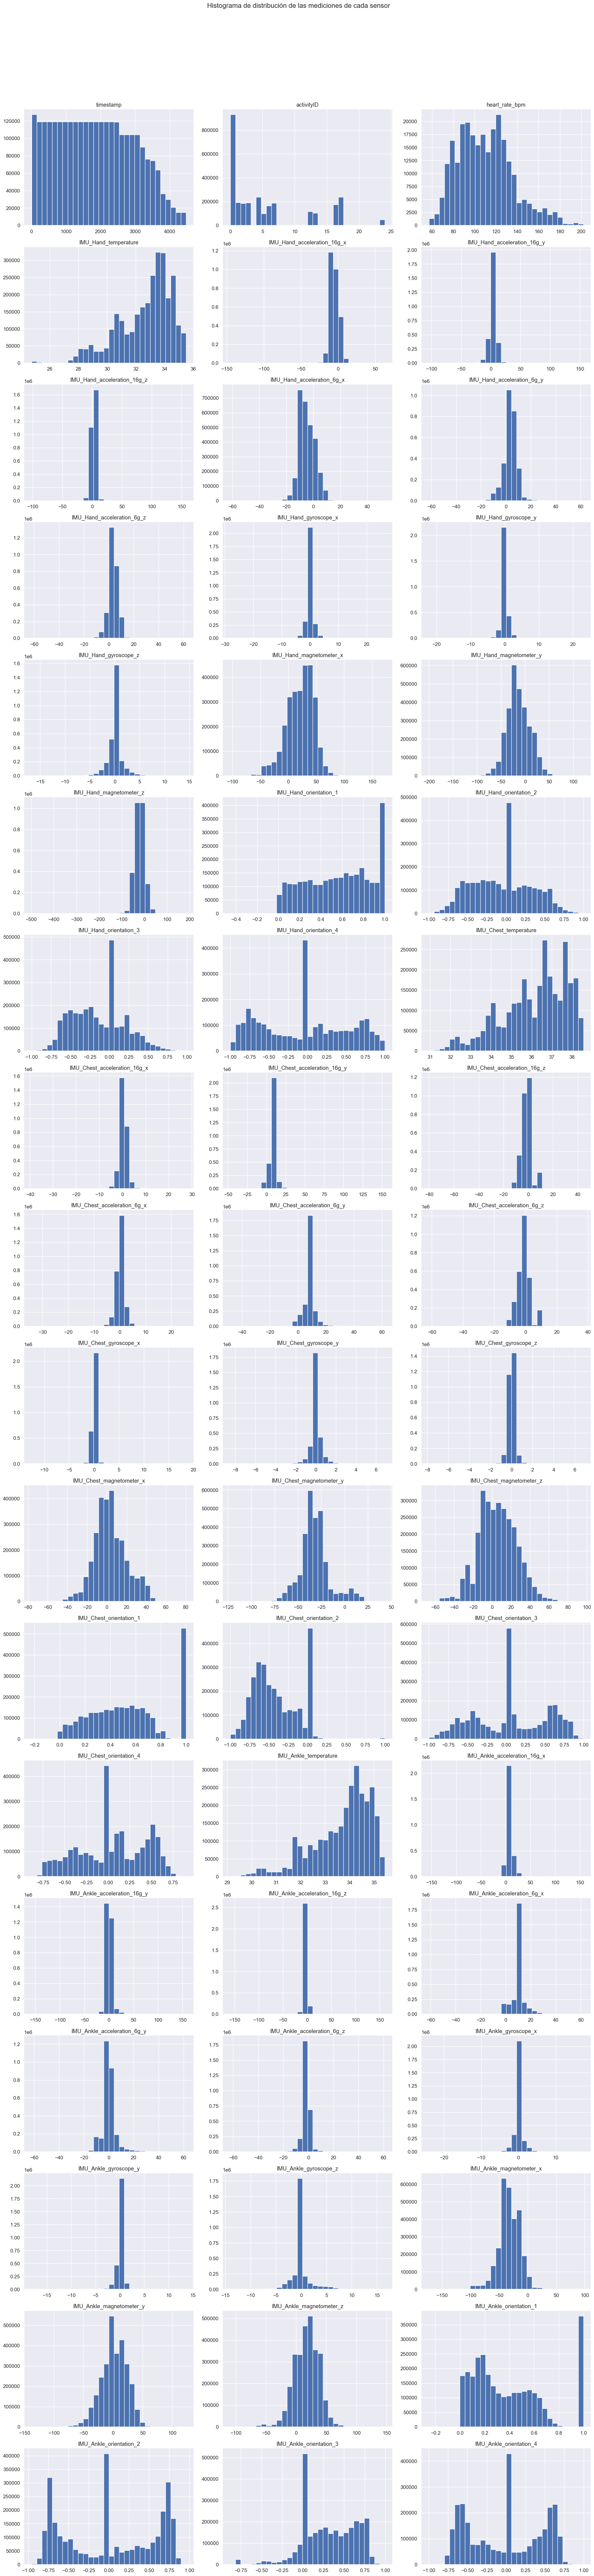

In [248]:

import math
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas numéricas y excluimos 'activityID'
pamap_numeric = pamap_data.select_dtypes(include=['number'])

# Calculamos cuántos atributos numéricos hay
num_attributes = pamap_numeric.shape[1]


# Máximo 3 columnas por fila
cols = 3
rows = math.ceil(num_attributes / cols)

# Aumentamos el tamaño total de la figura
plt.figure(figsize=(20, 5 * rows))

# Generar histogramas con layout y bins configurados
pamap_numeric.hist(
    bins=30,
    layout=(rows, cols),
    figsize=(20, 5 * rows)
)

plt.suptitle("Histograma de distribución de las mediciones de cada sensor", fontsize=16)

# Ajustar espaciado para que el título no se sobreponga
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

# 3. Tercera base de datos. Daily and Sports Activities

La base de datos se puede encontrar en:
https://archive.ics.uci.edu/dataset/256/daily+and+sports+activities

El paper que lo documenta se puede encontar en:
https://drive.google.com/file/d/1nHierAGkOzi2AH0bn7pSthXG1HCjshRp/view?usp=sharing

## 3.1. Cargar datos

In [95]:
class DataLoaderDSA(AbstractDataLoader):
    def __init__(self, src_path:str, keys:list, file_extension:str, delimiter:str):
        super().__init__(src_path, keys, file_extension, delimiter)
        
    
    def load_data(self):
        dataframes = []
        for activitity in os.listdir(self.src_path):
            act_path = f"{self.src_path}/{activitity}"
            for person in os.listdir(act_path):
                person_path = f"{self.src_path}/{activitity}/{person}"
                for segment in os.listdir(person_path):
                    segment_path = f"{self.src_path}/{activitity}/{person}/{segment}"
                    if self._is_valid_extension(segment):  
                        segment_features = pd.read_csv(segment_path, delimiter=self.delimiter, names=self.keys)
                        segment_features['activity_label'] = activitity
                        segment_features['person_id'] = person
                        segment_features['segment'] = segment
                        dataframes.append(segment_features)
        final_df = pd.concat(dataframes, ignore_index=True)
        return final_df
    
                
    def _is_valid_extension(self, file):
        return file.endswith(self.file_extension)


In [119]:
dsa_path = "datasets/3_dsaa/data"
keys = [
    # Tronco (T)
    "T_xacc", "T_yacc", "T_zacc", "T_xgyro", "T_ygyro", "T_zgyro", "T_xmag", "T_ymag", "T_zmag",
    
    # Brazo derecho (RA)
    "RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro", "RA_ygyro", "RA_zgyro", "RA_xmag", "RA_ymag", "RA_zmag",
    
    # Brazo izquierdo (LA)
    "LA_xacc", "LA_yacc", "LA_zacc", "LA_xgyro", "LA_ygyro", "LA_zgyro", "LA_xmag", "LA_ymag", "LA_zmag",
    
    # Pierna derecha (RL)
    "RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro", "RL_ygyro", "RL_zgyro", "RL_xmag", "RL_ymag", "RL_zmag",
    
    # Pierna izquierda (LL)
    "LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro", "LL_ygyro", "LL_zgyro", "LL_xmag", "LL_ymag", "LL_zmag"
]
file_extension = '.txt'
delimiter = r','
data_loader = DataLoaderDSA(dsa_path, keys, file_extension, delimiter)
dsa_df = data_loader.load_data()

## 3.2. Dimensiones y primeras 5 filas

In [121]:
dsa_df.shape

(1140000, 48)

In [123]:
dsa_df.head()

T_xacc  T_yacc  T_zacc  T_xgyro  T_ygyro  T_zgyro  T_xmag  T_ymag  T_zmag  \
0   8.130   1.035   5.422   -0.009    0.002   -0.003  -0.787  -0.070   0.157   
1   8.130   1.020   5.384   -0.009    0.023    0.002  -0.787  -0.068   0.159   
2   8.160   1.020   5.362    0.015    0.014    0.000  -0.787  -0.068   0.159   
3   8.160   1.005   5.377    0.007    0.018    0.006  -0.785  -0.070   0.159   
4   8.161   1.028   5.347    0.009    0.030   -0.005  -0.787  -0.069   0.159   

   RA_xacc  ...  LL_zacc  LL_xgyro  LL_ygyro  LL_zgyro  LL_xmag  LL_ymag  \
0    0.701  ...    2.622    -0.000    -0.012    -0.004    0.740    0.301   
1    0.718  ...    2.622    -0.015    -0.016     0.003    0.739    0.302   
2    0.698  ...    2.637    -0.013     0.006    -0.008    0.740    0.301   
3    0.728  ...    2.607    -0.006     0.010     0.007    0.740    0.302   
4    0.716  ...    2.622    -0.004    -0.008     0.003    0.738    0.301   

   LL_zmag  activity_label  person_id  segment  
0   -0.058             a01         p1  s01.txt  
1   -0.058             a01         p1  s01.txt  
2   -0.057             a01         p1  s01.txt  
3   -0.058             a01         p1  s01.txt  
4   -0.058             a01         p1  s01.txt  

[5 rows x 48 columns]

## 3.3. Identifica y elimina los datos asentes

In [128]:
dsa_df.isnull().sum()

T_xacc            0
T_yacc            0
T_zacc            0
T_xgyro           0
T_ygyro           0
T_zgyro           0
T_xmag            0
T_ymag            0
T_zmag            0
RA_xacc           0
RA_yacc           0
RA_zacc           0
RA_xgyro          0
RA_ygyro          0
RA_zgyro          0
RA_xmag           0
RA_ymag           0
RA_zmag           0
LA_xacc           0
LA_yacc           0
LA_zacc           0
LA_xgyro          0
LA_ygyro          0
LA_zgyro          0
LA_xmag           0
LA_ymag           0
LA_zmag           0
RL_xacc           0
RL_yacc           0
RL_zacc           0
RL_xgyro          0
RL_ygyro          0
RL_zgyro          0
RL_xmag           0
RL_ymag           0
RL_zmag           0
LL_xacc           0
LL_yacc           0
LL_zacc           0
LL_xgyro          0
LL_ygyro          0
LL_zgyro          0
LL_xmag           0
LL_ymag           0
LL_zmag           0
activity_label    0
person_id         0
segment           0
dtype: int64

## 3.4. Tipos de datos de cada atributo

In [131]:
dsa_df.dtypes

T_xacc            float64
T_yacc            float64
T_zacc            float64
T_xgyro           float64
T_ygyro           float64
T_zgyro           float64
T_xmag            float64
T_ymag            float64
T_zmag            float64
RA_xacc           float64
RA_yacc           float64
RA_zacc           float64
RA_xgyro          float64
RA_ygyro          float64
RA_zgyro          float64
RA_xmag           float64
RA_ymag           float64
RA_zmag           float64
LA_xacc           float64
LA_yacc           float64
LA_zacc           float64
LA_xgyro          float64
LA_ygyro          float64
LA_zgyro          float64
LA_xmag           float64
LA_ymag           float64
LA_zmag           float64
RL_xacc           float64
RL_yacc           float64
RL_zacc           float64
RL_xgyro          float64
RL_ygyro          float64
RL_zgyro          float64
RL_xmag           float64
RL_ymag           float64
RL_zmag           float64
LL_xacc           float64
LL_yacc           float64
LL_zacc     

## 3.5. Resumen estadístico

In [137]:
dsa_df.describe()

T_xacc      T_yacc      T_zacc     T_xgyro     T_ygyro     T_zgyro  \
count 1140000.000 1140000.000 1140000.000 1140000.000 1140000.000 1140000.000   
mean        7.766      -0.811       2.769      -0.003       0.014      -0.003   
std         5.638       2.623       3.538       0.794       0.691       0.311   
min       -99.715     -49.941     -62.664     -27.851     -23.598     -12.067   
25%         6.907      -1.510       0.900      -0.163      -0.102      -0.097   
50%         8.830      -0.390       2.704       0.000       0.017      -0.003   
75%         9.691       0.414       4.405       0.165       0.131       0.089   
max        93.694      41.013     120.530      27.671      14.379      19.262   

           T_xmag      T_ymag      T_zmag     RA_xacc  ...     RL_zmag  \
count 1140000.000 1140000.000 1140000.000 1140000.000  ... 1140000.000   
mean       -0.598       0.062      -0.273       4.261  ...       0.069   
std         0.356       0.340       0.373       5.821  ...       0.362   
min        -1.423      -1.023      -1.081     -49.535  ...      -0.988   
25%        -0.825      -0.179      -0.602       0.095  ...      -0.215   
50%        -0.690       0.022      -0.309       4.143  ...       0.062   
75%        -0.493       0.282       0.041       8.505  ...       0.335   
max         1.022       1.031       0.963      71.652  ...       1.118   

          LL_xacc     LL_yacc     LL_zacc    LL_xgyro    LL_ygyro    LL_zgyro  \
count 1140000.000 1140000.000 1140000.000 1140000.000 1140000.000 1140000.000   
mean       -7.324      -3.218      -0.530      -0.016       0.028      -0.002   
std         5.811       5.926       3.393       0.868       0.484       1.159   
min      -118.030    -119.810     -43.382     -12.085      -6.926      -6.783   
25%        -9.813      -7.964      -2.212      -0.315      -0.124      -0.362   
50%        -8.577      -2.286      -0.781      -0.004       0.000      -0.001   
75%        -2.685       0.108       0.398       0.197       0.142       0.573   
max        17.362      78.947      60.968      19.158       8.918       7.109   

          LL_xmag     LL_ymag     LL_zmag  
count 1140000.000 1140000.000 1140000.000  
mean        0.458       0.296       0.065  
std         0.380       0.384       0.357  
min        -0.844      -0.902      -1.126  
25%         0.292       0.019      -0.171  
50%         0.508       0.351       0.082  
75%         0.690       0.585       0.298  
max         1.374       1.247       1.043  

[8 rows x 45 columns]

## 3.6. Distribución de clases

In [142]:
dsa_class_distribution = dsa_df['activity_label'].value_counts()
dsa_class_distribution

activity_label
a01    60000
a11    60000
a18    60000
a17    60000
a16    60000
a15    60000
a14    60000
a13    60000
a12    60000
a10    60000
a02    60000
a09    60000
a08    60000
a07    60000
a06    60000
a05    60000
a04    60000
a03    60000
a19    60000
Name: count, dtype: int64

## 3.7. Correlación entre atributos

In [153]:
import pandas as pd

df_numeric = dsa_df.select_dtypes(include=['number'])

dsa_corr_matrix = df_numeric.corr(method='pearson')
dsa_corr_matrix

T_xacc  T_yacc  T_zacc  T_xgyro  T_ygyro  T_zgyro  T_xmag  T_ymag  \
T_xacc     1.000   0.053  -0.055   -0.027   -0.069    0.003  -0.591  -0.185   
T_yacc     0.053   1.000   0.067   -0.118   -0.012   -0.038  -0.134  -0.460   
T_zacc    -0.055   0.067   1.000    0.007   -0.079    0.011   0.339  -0.040   
T_xgyro   -0.027  -0.118   0.007    1.000    0.056   -0.013   0.002   0.010   
T_ygyro   -0.069  -0.012  -0.079    0.056    1.000    0.043   0.003  -0.003   
T_zgyro    0.003  -0.038   0.011   -0.013    0.043    1.000  -0.001   0.025   
T_xmag    -0.591  -0.134   0.339    0.002    0.003   -0.001   1.000   0.237   
T_ymag    -0.185  -0.460  -0.040    0.010   -0.003    0.025   0.237   1.000   
T_zmag     0.152  -0.155  -0.261   -0.004   -0.001   -0.000  -0.196  -0.001   
RA_xacc    0.364  -0.071  -0.044   -0.014    0.026    0.043  -0.148   0.003   
RA_yacc    0.357   0.195   0.048   -0.022   -0.018   -0.014  -0.202  -0.148   
RA_zacc   -0.082  -0.136   0.086    0.028   -0.005    0.001   0.070   0.135   
RA_xgyro   0.048  -0.048   0.006    0.126   -0.033    0.026  -0.005   0.011   
RA_ygyro   0.003  -0.067   0.030    0.276    0.010    0.140   0.012   0.016   
RA_zgyro   0.034  -0.086  -0.002    0.124   -0.017    0.139  -0.011   0.023   
RA_xmag   -0.108   0.030  -0.031   -0.017   -0.012    0.006   0.190  -0.111   
RA_ymag   -0.059  -0.176   0.057   -0.009   -0.004   -0.003   0.201   0.262   
RA_zmag    0.028  -0.012   0.019    0.005    0.003   -0.005  -0.006  -0.491   
LA_xacc    0.424   0.133  -0.066   -0.000    0.024   -0.023  -0.205  -0.149   
LA_yacc   -0.278  -0.135  -0.091    0.014    0.036   -0.013   0.094   0.121   
LA_zacc    0.160   0.380   0.090   -0.034   -0.009    0.012  -0.214  -0.240   
LA_xgyro  -0.039  -0.053  -0.007    0.128    0.003    0.043   0.008   0.010   
LA_ygyro   0.002   0.048   0.039   -0.222    0.014   -0.112   0.024  -0.009   
LA_zgyro  -0.029  -0.090  -0.012    0.170    0.021    0.131   0.005   0.029   
LA_xmag   -0.159  -0.100   0.091    0.031   -0.013   -0.008   0.259   0.116   
LA_ymag   -0.009   0.137  -0.053   -0.007   -0.003   -0.014  -0.085   0.301   
LA_zmag   -0.108  -0.343  -0.007   -0.005    0.000    0.024   0.250   0.462   
RL_xacc   -0.591  -0.195   0.009   -0.032    0.046    0.062   0.305   0.143   
RL_yacc   -0.296   0.100   0.115    0.091    0.079   -0.026   0.115  -0.039   
RL_zacc    0.112   0.437   0.028   -0.033    0.006    0.003  -0.202  -0.328   
RL_xgyro   0.012  -0.025  -0.036   -0.033   -0.008   -0.095  -0.006   0.003   
RL_ygyro   0.055   0.020   0.015   -0.047   -0.092    0.049  -0.022   0.012   
RL_zgyro  -0.010   0.181  -0.015   -0.328   -0.090   -0.065   0.005  -0.049   
RL_xmag    0.204   0.216  -0.094    0.024    0.008   -0.056  -0.364  -0.136   
RL_ymag    0.037  -0.128  -0.105    0.019    0.011   -0.091  -0.036   0.001   
RL_zmag   -0.177  -0.299  -0.027    0.008   -0.001   -0.004   0.211   0.825   
LL_xacc   -0.593  -0.090   0.021    0.044    0.064   -0.040   0.269   0.067   
LL_yacc    0.237  -0.069  -0.094    0.062   -0.069   -0.028  -0.078   0.029   
LL_zacc   -0.230  -0.514  -0.004    0.058    0.013   -0.014   0.257   0.378   
LL_xgyro  -0.017  -0.021   0.026   -0.009    0.024   -0.106   0.010  -0.003   
LL_ygyro   0.006  -0.044  -0.036    0.084   -0.069   -0.065  -0.030   0.006   
LL_zgyro   0.003   0.173   0.029   -0.309    0.098   -0.036  -0.009  -0.050   
LL_xmag    0.228   0.126  -0.152   -0.032    0.008    0.053  -0.404   0.011   
LL_ymag    0.018   0.206   0.019    0.026   -0.009   -0.077  -0.034   0.020   
LL_zmag    0.172   0.328   0.038   -0.006    0.004    0.006  -0.226  -0.852   

          T_zmag  RA_xacc  ...  RL_zmag  LL_xacc  LL_yacc  LL_zacc  LL_xgyro  \
T_xacc     0.152    0.364  ...   -0.177   -0.593    0.237   -0.230    -0.017   
T_yacc    -0.155   -0.071  ...   -0.299   -0.090   -0.069   -0.514    -0.021   
T_zacc    -0.261   -0.044  ...   -0.027    0.021   -0.094   -0.004     0.026   
T_xgyro   -0.004   -0.014  ...    0.008    0.044    0.0

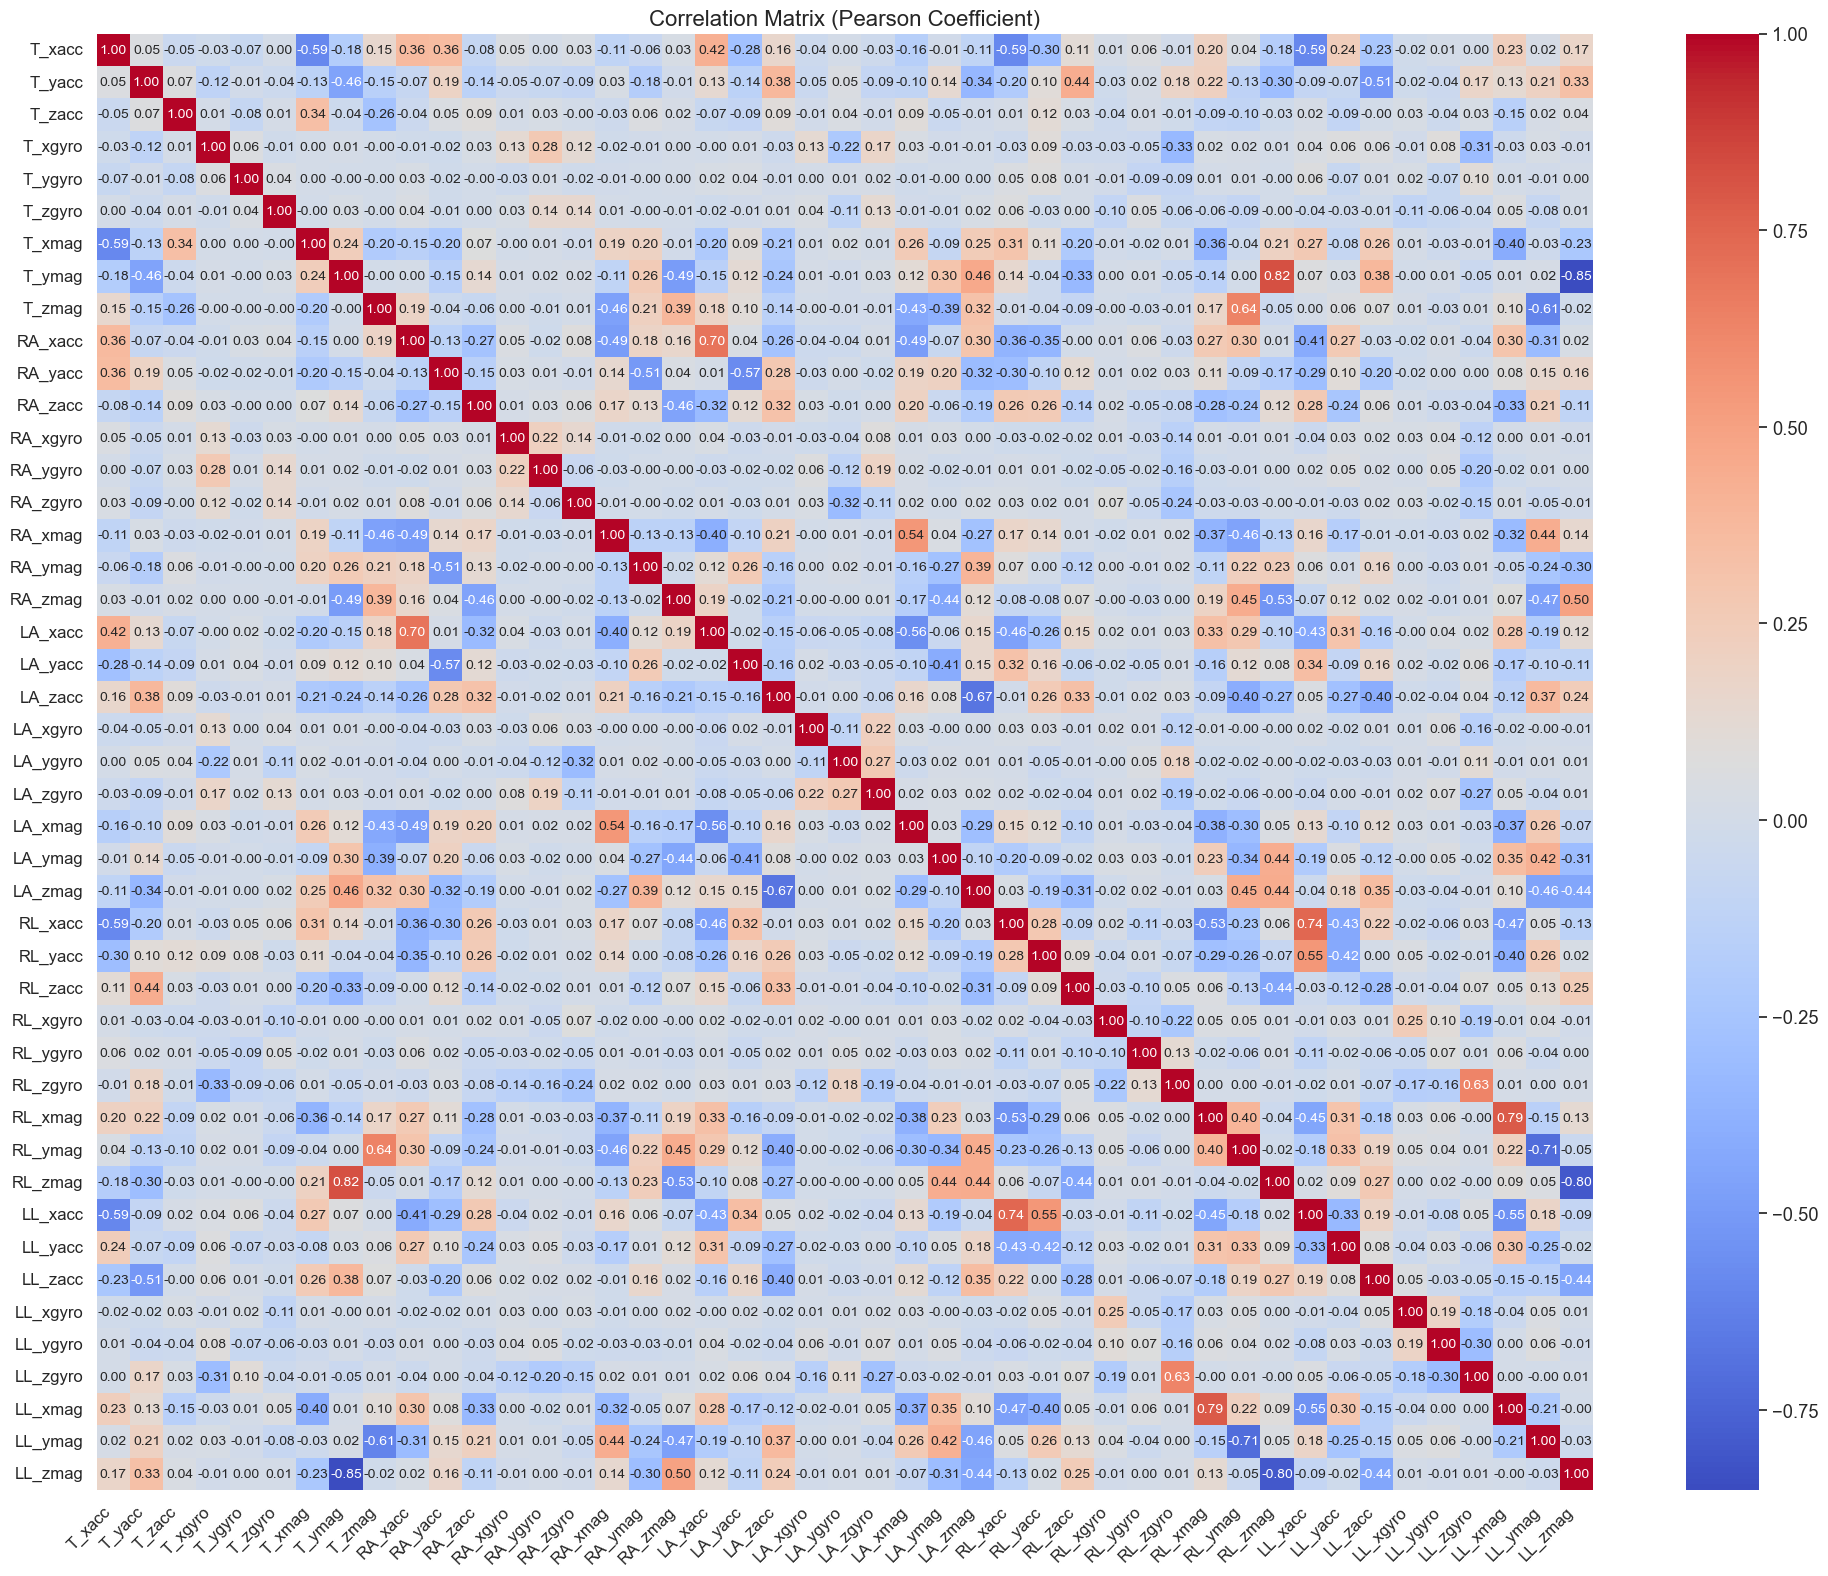

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optionally increase the global font scale
sns.set(font_scale=1.2)

plt.figure(figsize=(20, 16))  # Increase figure size for more space

sns.heatmap(
    dsa_corr_matrix, 
    annot=True,        # Show numerical values
    fmt=".2f",         # Format with 2 decimals
    cmap="coolwarm",
    annot_kws={"size": 10}  # Increase font size for the numbers in cells
)

# Rotate x-axis labels for clarity, adjust font sizes
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Give the plot a title
plt.title('Correlation Matrix (Pearson Coefficient)', fontsize=16)

# Adjust layout so everything fits
plt.tight_layout()

plt.show()


## 3.8. Histograma de atributos

<Figure size 2000x7500 with 0 Axes>

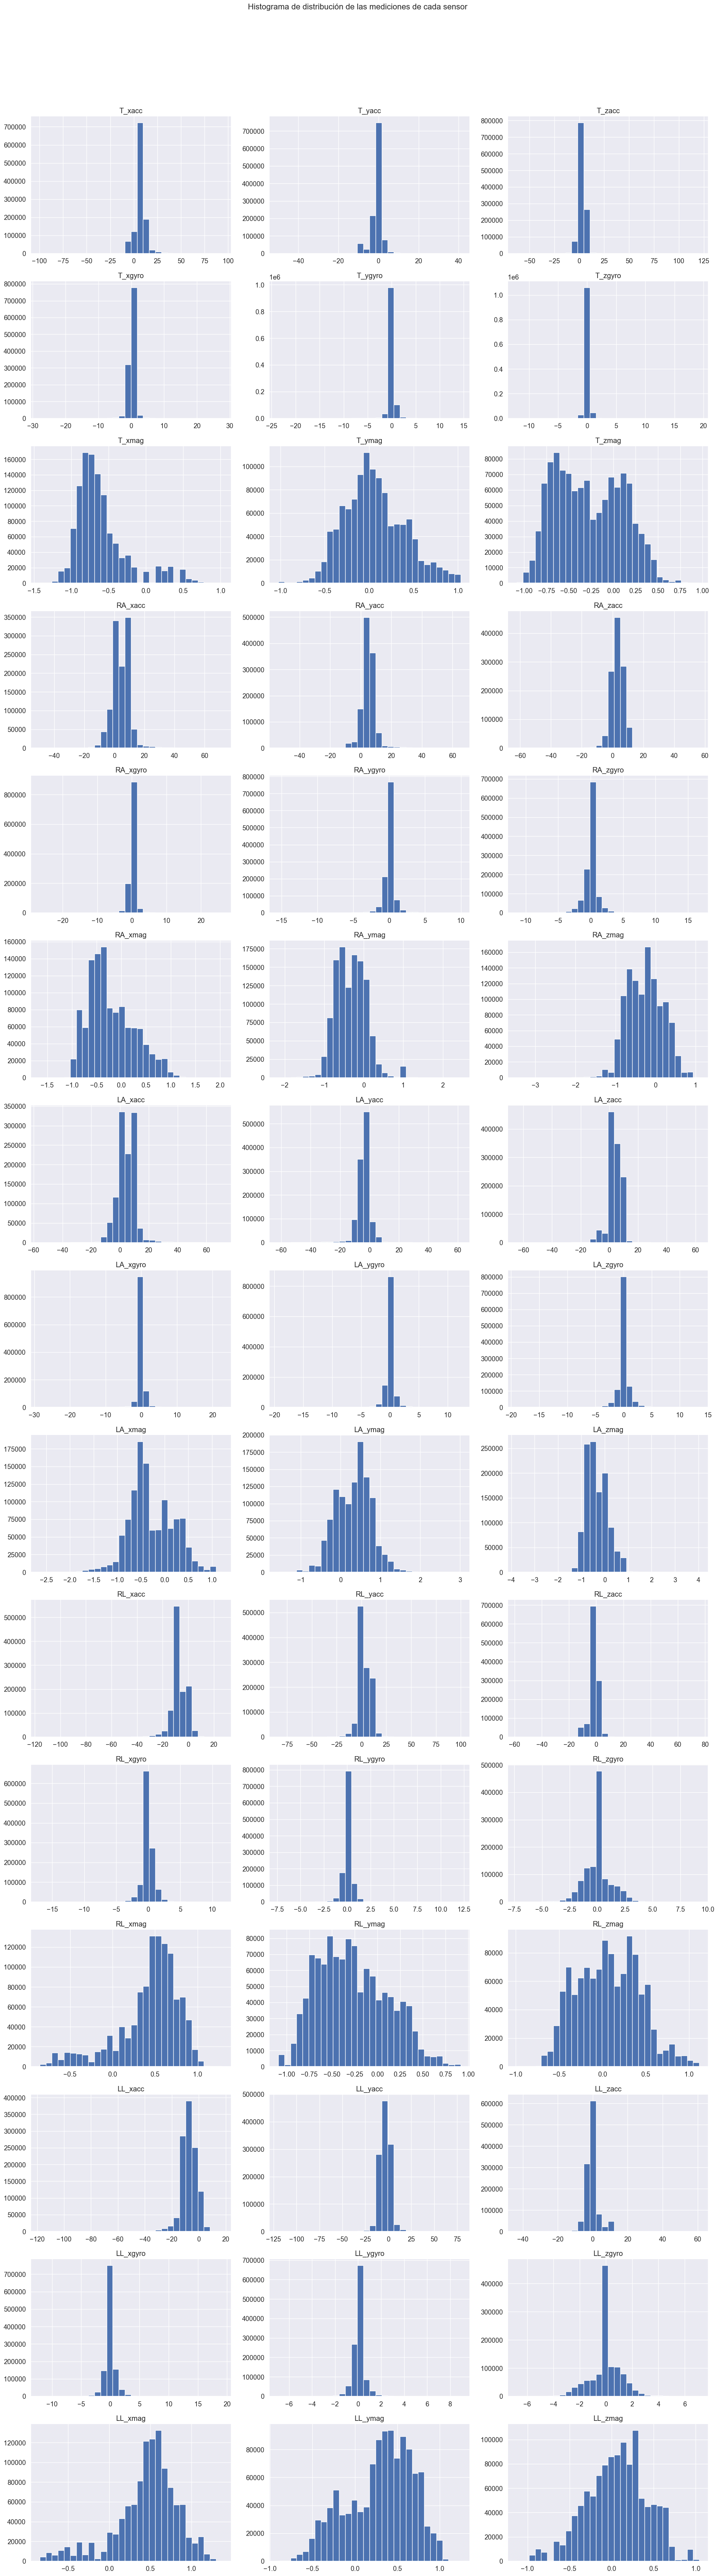

In [174]:
import math
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas numéricas
dsa_df_numeric = dsa_df.select_dtypes(include=['number'])

# Calculamos cuántos atributos numéricos hay
num_attributes = dsa_df_numeric.shape[1]

# Máximo 3 columnas por fila
cols = 3
rows = math.ceil(num_attributes / cols)

# Aumentamos el tamaño total de la figura
plt.figure(figsize=(20, 5 * rows))

# Generar histogramas con layout y bins configurados
dsa_df_numeric.hist(
    bins=30,
    layout=(rows, cols),
    figsize=(20, 5 * rows)
)

plt.suptitle("Histograma de distribución de las mediciones de cada sensor", fontsize=16)

# Ajustar espaciado para que el título no se sobreponga
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()